<a href="https://colab.research.google.com/github/hazalkntr/ML-project-intro-to-data-science/blob/main/hotelBooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Demand and Prediction of Cancellations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import chi2, RFECV, RFE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, make_scorer, roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy import stats

In [ ]:
df = pd.read_csv("hotelBookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Handling Missing Values

In [ ]:
df = df.drop('company', axis=1)
df['agent'] = df['agent'].fillna(df['agent'].median())
df['children'] = df['children'].fillna(df['children'].median())
df['country'] = df['country'].fillna('unknown')
df.dropna(subset = ['children'], inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
#num of duplicates
df.duplicated().sum()

32001

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
(df.select_dtypes(include=['int64','float64'])<0).sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [ ]:
df = df[df['adr']>=0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87388 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87388 non-null  object 
 1   is_canceled                     87388 non-null  int64  
 2   lead_time                       87388 non-null  int64  
 3   arrival_date_year               87388 non-null  int64  
 4   arrival_date_month              87388 non-null  object 
 5   arrival_date_week_number        87388 non-null  int64  
 6   arrival_date_day_of_month       87388 non-null  int64  
 7   stays_in_weekend_nights         87388 non-null  int64  
 8   stays_in_week_nights            87388 non-null  int64  
 9   adults                          87388 non-null  int64  
 10  children                        87388 non-null  float64
 11  babies                          87388 non-null  int64  
 12  meal                           

## Checking Miswritings and Unique Items

In [ ]:
dfUnique = pd.DataFrame(df, columns=["hotel", "arrival_date_month","arrival_date_year", "country", "market_segment", "distribution_channel",
                                     "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status"])
for col in dfUnique:
   print (col, df[col].unique())

hotel ['Resort Hotel' 'City Hotel']
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
arrival_date_year [2015 2016 2017]
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' '

## Check Logical Errors

In [ ]:
# the three columns cannot be zero at the same row
check = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[check]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
2224                       3       0  ...                1    No Deposit   
2409                       0       0  ...                0    No Deposit   
3181                       2       0  ...                0    No Deposit   
3684                       4       0  ...                1    No Deposit   
3708                       4       0  ...                1    No Deposit   
...                      ...     ...  ...              ...           ...   
115029                     3       0  ...                1    No Deposit   
115091                     1       0  ...                0    No Deposit   
116251                     1       0  ...                2    No Deposit   
116534                     5       0  ...                1    No Deposit   
117087                     2       0  ...                0    No Deposit   

        agent days_in_waiting_list    customer_type     adr  \
2224     14.0                    0  Transient-Party    0.00   
2409     14.0                    0        Transient    0.00   
3181     38.0                    0  Transient-Party    0.00   
3684    308.0                  122  Transient-Party    0.00   
3708    308.0                  122  Transient-Party    0.00   
...       ...                  ...              ...     ...   
115029    7.0                    0        Transient  100.80   
115091   14.0                    0        Transient    0.00   
116251  425.0                    0        Transient   73.80   
116534    9.0                    0  Transient-Party   22.86   
117087   52.0                    0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
2224                              0                          0   
24

In [ ]:
index = df[(df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)].index
df.drop(index , inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   booking_changes  deposit_type  agent days_in_waiting_list customer_type  \
0                3    No Deposit   14.0                    0     Transient   
1                4    No Deposit   14.0                    0     Transient   
2                0    No Deposit   14.0                    0     Transient   
3                0    No Deposit  304.0                    0     Transient   
4                0    No Deposit  240.0                    0     Transient   

    adr  required_car_parking_spaces  total_of_special_requests  \
0   0.0                            0                          0   
1   0.0                            0                          0   
2  75.0                            0                          0   
3  75.0                            0                          0   
4  98.0                            0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87222 entries, 0 to 87221
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87222 non-null  object 
 1   is_canceled                     87222 non-null  int64  
 2   lead_time                       87222 non-null  int64  
 3   arrival_date_year               87222 non-null  int64  
 4   arrival_date_month              87222 non-null  object 
 5   arrival_date_week_number        87222 non-null  int64  
 6   arrival_date_day_of_month       87222 non-null  int64  
 7   stays_in_weekend_nights         87222 non-null  int64  
 8   stays_in_week_nights            87222 non-null  int64  
 9   adults                          87222 non-null  int64  
 10  children                        87222 non-null  float64
 11  babies                          87222 non-null  int64  
 12  meal                            

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
agent                              333
days_in_waiting_list               127
customer_type            

# Data Analysis

In [ ]:
# guest arrival dates
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].replace(month_mapping)

In [ ]:
df[['arrival_date_year','arrival_date_month', 'arrival_date_day_of_month']].head()

arrival_date_year  arrival_date_month  arrival_date_day_of_month
0               2015                   7                          1
1               2015                   7                          1
2               2015                   7                          1
3               2015                   7                          1
4               2015                   7                          1

In [ ]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'].head()

0    2015-7-1
1    2015-7-1
2    2015-7-1
3    2015-7-1
4    2015-7-1
Name: arrival_date, dtype: object

In [ ]:
# add total guests column
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'].head()

0    2.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: total_guests, dtype: float64

In [ ]:
df[['arrival_date', 'total_guests']].head()

arrival_date  total_guests
0     2015-7-1           2.0
1     2015-7-1           2.0
2     2015-7-1           1.0
3     2015-7-1           1.0
4     2015-7-1           2.0

In [ ]:
# see the pattern of arrivals
df.groupby('arrival_date')['total_guests'].sum().head()

arrival_date
2015-10-1     171.0
2015-10-10    210.0
2015-10-11    144.0
2015-10-12    235.0
2015-10-13    128.0
Name: total_guests, dtype: float64

In [ ]:
# create a dataset that includes only the rows which are not cancelled
not_cancelled = df[df['is_canceled'] == 0]
not_cancelled.head()

hotel  is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel            0        342               2015   
1  Resort Hotel            0        737               2015   
2  Resort Hotel            0          7               2015   
3  Resort Hotel            0         13               2015   
4  Resort Hotel            0         14               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   7                        27                          1   
1                   7                        27                          1   
2                   7                        27                          1   
3                   7                        27                          1   
4                   7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                        0                     0       2  ...   14.0   
1                        0                     0       2  ...   14.0   
2                        0                     1       1  ...   14.0   
3                        0                     1       1  ...  304.0   
4                        0                     2       2  ...  240.0   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0                           0   
1                     0     Transient   0.0                           0   
2                     0     Transient  75.0                           0   
3                     0     Transient  75.0                           0   
4                     0     Transient  98.0                           0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                         0           Check-Out               2015-07-01   
1                         0           Check-Out               2015-07-01   
2                         0           Check-Out               2015-07-02   
3                         0           Check-Out               2015-07-02   
4                         1           Check-Out               2015-07-03   

   arrival_date total_guests  
0      2015-7-1          2.0  
1      2015-7-1          2.0  
2      2015-7-1          1.0  
3      2015-7-1          1.0  
4      2015-7-1          2.0  

[5 rows x 33 columns]

In [ ]:
country_wise = not_cancelled['country'].value_counts().reset_index()
country_wise.columns = ['country', 'no_of_guests']
country_wise

country  no_of_guests
0       PRT         17569
1       GBR          8438
2       FRA          7091
3       ESP          5382
4       DEU          4332
..      ...           ...
161     ZMB             1
162     SYC             1
163     MDG             1
164     SMR             1
165     FRO             1

[166 rows x 2 columns]

In [ ]:
# check if the dataset is logical
not_cancelled['stays_in_weekend_nights'].equals(not_cancelled['stays_in_week_nights'])

False

In [ ]:
not_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63213 entries, 0 to 87221
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           63213 non-null  object 
 1   is_canceled                     63213 non-null  int64  
 2   lead_time                       63213 non-null  int64  
 3   arrival_date_year               63213 non-null  int64  
 4   arrival_date_month              63213 non-null  int64  
 5   arrival_date_week_number        63213 non-null  int64  
 6   arrival_date_day_of_month       63213 non-null  int64  
 7   stays_in_weekend_nights         63213 non-null  int64  
 8   stays_in_week_nights            63213 non-null  int64  
 9   adults                          63213 non-null  int64  
 10  children                        63213 non-null  float64
 11  babies                          63213 non-null  int64  
 12  meal                            

In [ ]:
not_cancelled.describe()

is_canceled     lead_time  arrival_date_year  arrival_date_month  \
count      63213.0  63213.000000       63213.000000        63213.000000   
mean           0.0     70.190562        2016.173145            6.467230   
std            0.0     81.654503           0.691291            3.158166   
min            0.0      0.000000        2015.000000            1.000000   
25%            0.0      7.000000        2016.000000            4.000000   
50%            0.0     38.000000        2016.000000            7.000000   
75%            0.0    110.000000        2017.000000            9.000000   
max            0.0    737.000000        2017.000000           12.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              63213.000000               63213.000000   
mean                  26.820322                  15.786547   
std                   13.922993                   8.813264   
min                    1.000000                   1.000000   
25%                   15.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             63213.000000          63213.000000  63213.000000   
mean                  0.966020              2.518279      1.848670   
std                   1.006882              1.981668      0.510666   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              3.000000      2.000000   
max                  19.000000             50.000000      4.000000   

           children  ...  is_repeated_guest  previous_cancellations  \
count  63213.000000  ...       63213.000000            63213.000000   
mean       0.120023  ...           0.049088                0.018683   
std        0.421125  ...           0.216053                0.296709   
min        0.000000  ...           0.000000                0.000000   
25%        0.000000  ...           0.000000                0.000000   
50%        0.000000  ...           0.000000                0.000000   
75%        0.000000  ...           0.000000                0.000000   
max        3.000000  ...           1.000000               13.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    63213.000000     63213.000000  63213.000000   
mean                         0.239777         0.309335     83.513897   
std                          1.970856         0.750743    108.745646   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000     14.000000   
75%                          0.000000         0.000000    196.000000   
max                         72.000000        18.000000    535.000000   

       days_in_waiting_list           adr  required_car_parking_spaces  \
count          63213.000000  63213.000000                 63213.000000   
mean               0.717352    102.217985                     0.116337   
std                9.726604     51.239039                     0.325187   
min                0.000000      0.000000                     0.000000   
25%                0.000000     68.000000                     0.000000   
50%                0.000000     94.890000                     0.000000   
75%                0.000000    129.410000                     0.000000   
max              379.000000    510.000000                     8.000000   

       total_of_special_requests  total_guests  
count               63213.000000  63213.000000  
mean                    0.760919      1.980985  
std                     0.850066      

In [ ]:
guests_arrival = not_cancelled.groupby('arrival_date')['total_guests'].sum()
guests_arrival.head()

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
Name: total_guests, dtype: float64

### Exploratory Data Analysis

See the pattern of arrivals

<ipython-input-697-1efeaa7116d1>:18: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



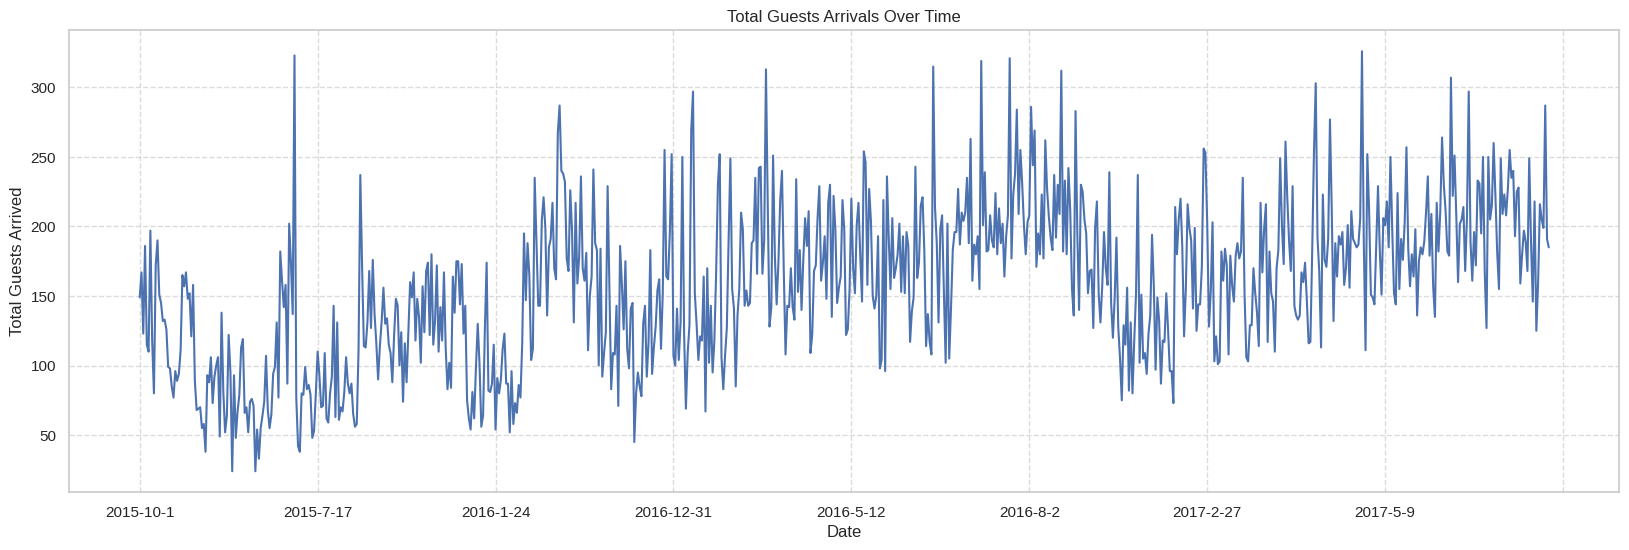

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the data
guests_arrival.plot()

# Add title
plt.title('Total Guests Arrivals Over Time')

# Add labels
plt.xlabel('Date')
plt.ylabel('Total Guests Arrived')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the style
plt.style.use('seaborn-darkgrid')

# Show the plot
plt.show();

Guests in each hotel type

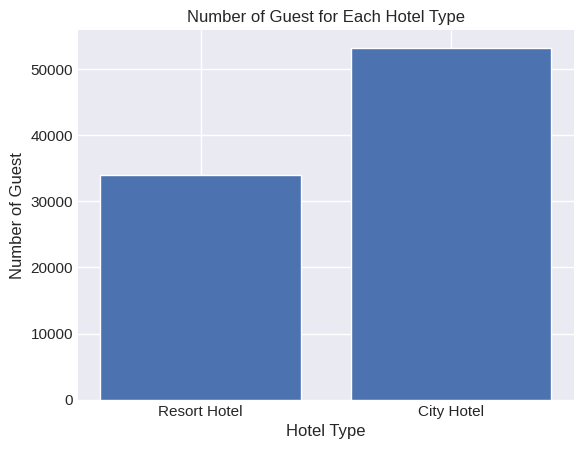

In [ ]:
resort_len= len(df[df['hotel']=='Resort Hotel'])
city_len=len(df[df['hotel']=='City Hotel'])

hotel_types = ['Resort Hotel', 'City Hotel']
lengths = [resort_len, city_len]

plt.bar(hotel_types, lengths)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Guest')
plt.title('Number of Guest for Each Hotel Type')
plt.show()

Arrival Distribution

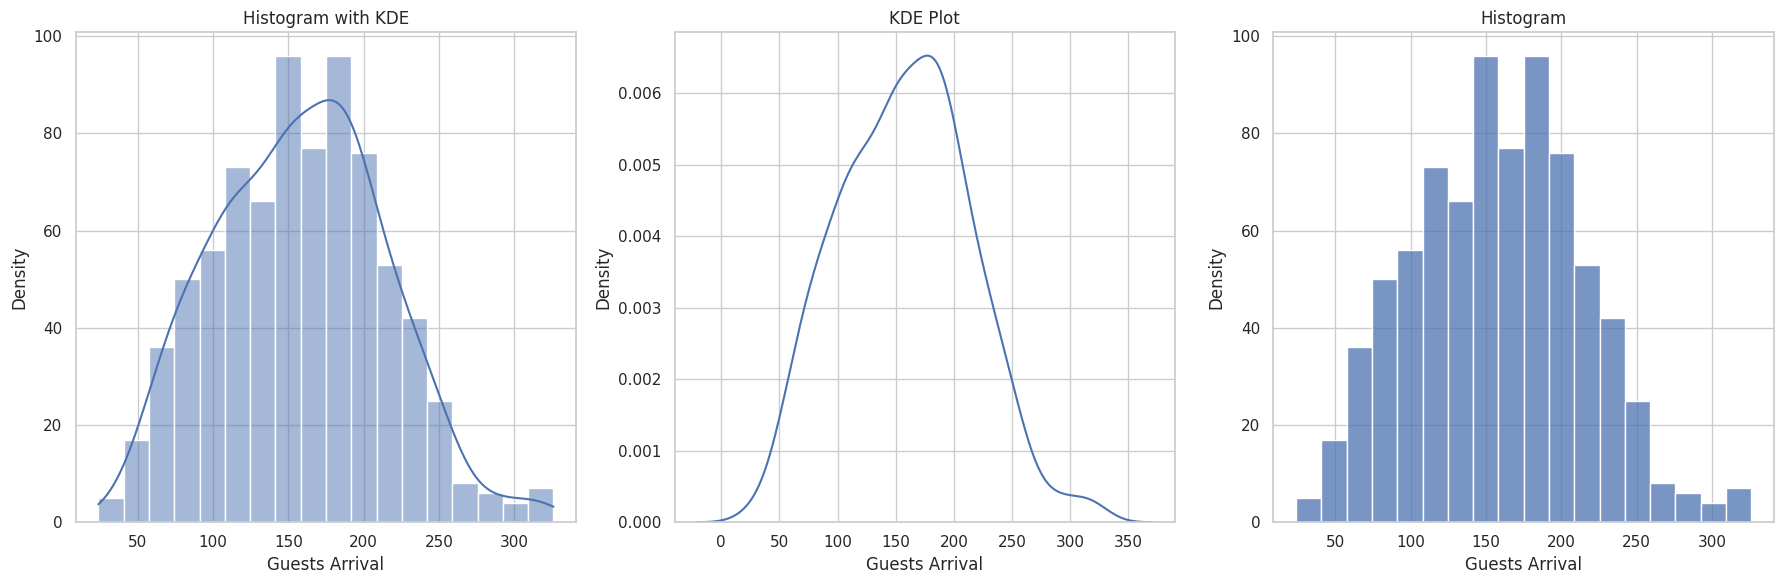

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot a histogram with a KDE plot
sns.histplot(data=guests_arrival, kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE')

# Plot just a KDE plot
sns.kdeplot(data=guests_arrival, ax=axes[1])
axes[1].set_title('KDE Plot')

# Plot a simple histogram
sns.histplot(data=guests_arrival, ax=axes[2])
axes[2].set_title('Histogram')

# Add labels and titles
for ax in axes:
    ax.set_xlabel('Guests Arrival')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

Violin plot (box plot and density plot together) to see the distribution of different years' cancellations and lead times

Text(0, 0.5, 'Lead Time')

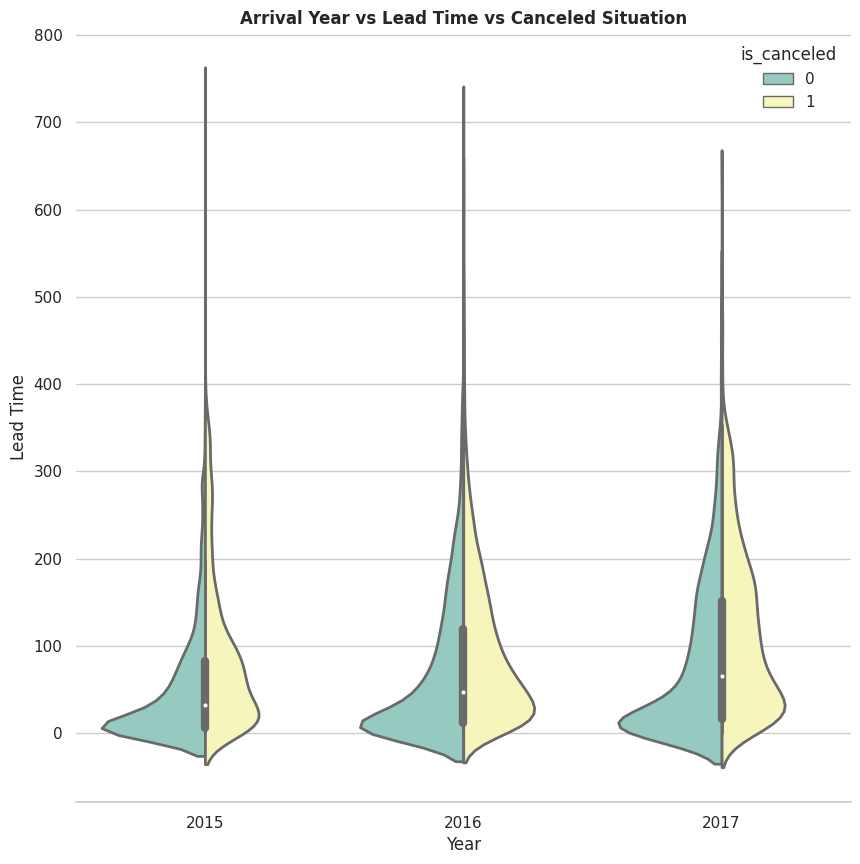

In [ ]:
# `arrival_date_year` vs `lead_time` vs `is_canceled` exploration with violin plot

plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

From which countries are the guests?

In [ ]:
# Define a custom color scale
color_scale = px.colors.sequential.Plasma

fig = px.choropleth(country_wise,
                   locations='country',
                   color='no_of_guests',
                   hover_name='country',
                   color_continuous_scale=color_scale,
                   title='Country Wise Distribution of Guests',
                   labels={'no_of_guests': 'Number of Guests'},
                   projection="natural earth")

# Customize the appearance
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    showocean=True,
    oceancolor="lightblue"
)

# Customize the legend
fig.update_coloraxes(colorbar_title="Number of Guests")

# Show the plot
fig.show()

What is the most popular market segment?

In [ ]:
# Calculate value counts
value_counts = df['market_segment'].value_counts()

# Create the pie chart
fig = px.pie(
    names=value_counts.index,
    values=value_counts.values,
    hole=0.3,  # Donut chart with a hole in the center
)

# Customize the layout and appearance
fig.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0],  # Explode the first slice (0.1)
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], line=dict(color='white', width=2))
)

fig.update_layout(
    title="Market Segment Distribution",
    showlegend=False,  # Hide legend
    annotations=[
        dict(text='Market Segment', x=0.5, y=0.5, font_size=20, showarrow=False)
    ],
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margin for title and labels
)

# Show the plot
fig.show()

Stays in weekends by different market segments

<Axes: xlabel='market_segment', ylabel='stays_in_weekend_nights'>

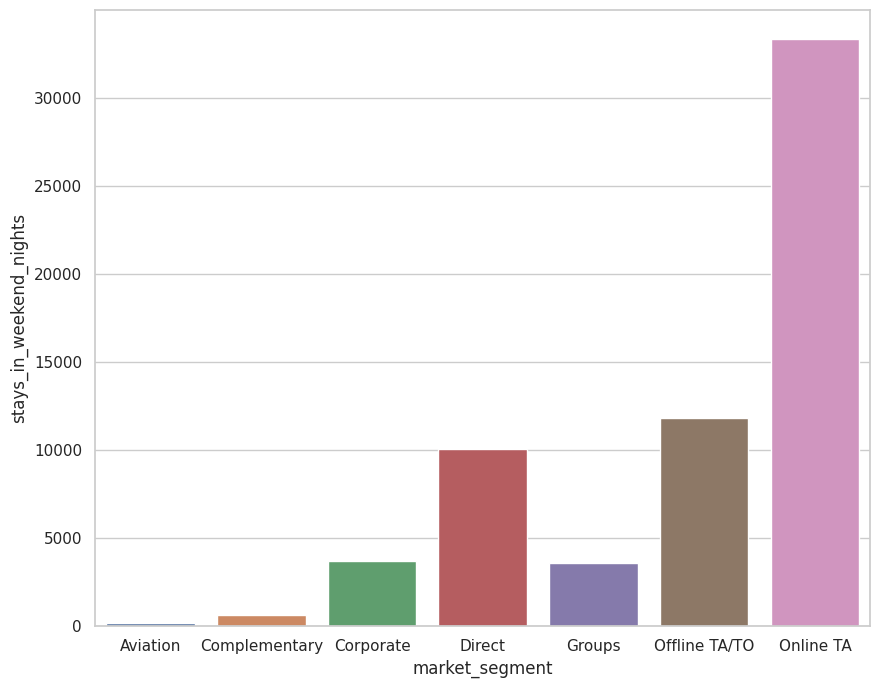

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

Average price per night of many room types in different market segments

<ipython-input-698-ff13e7ba5d61>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




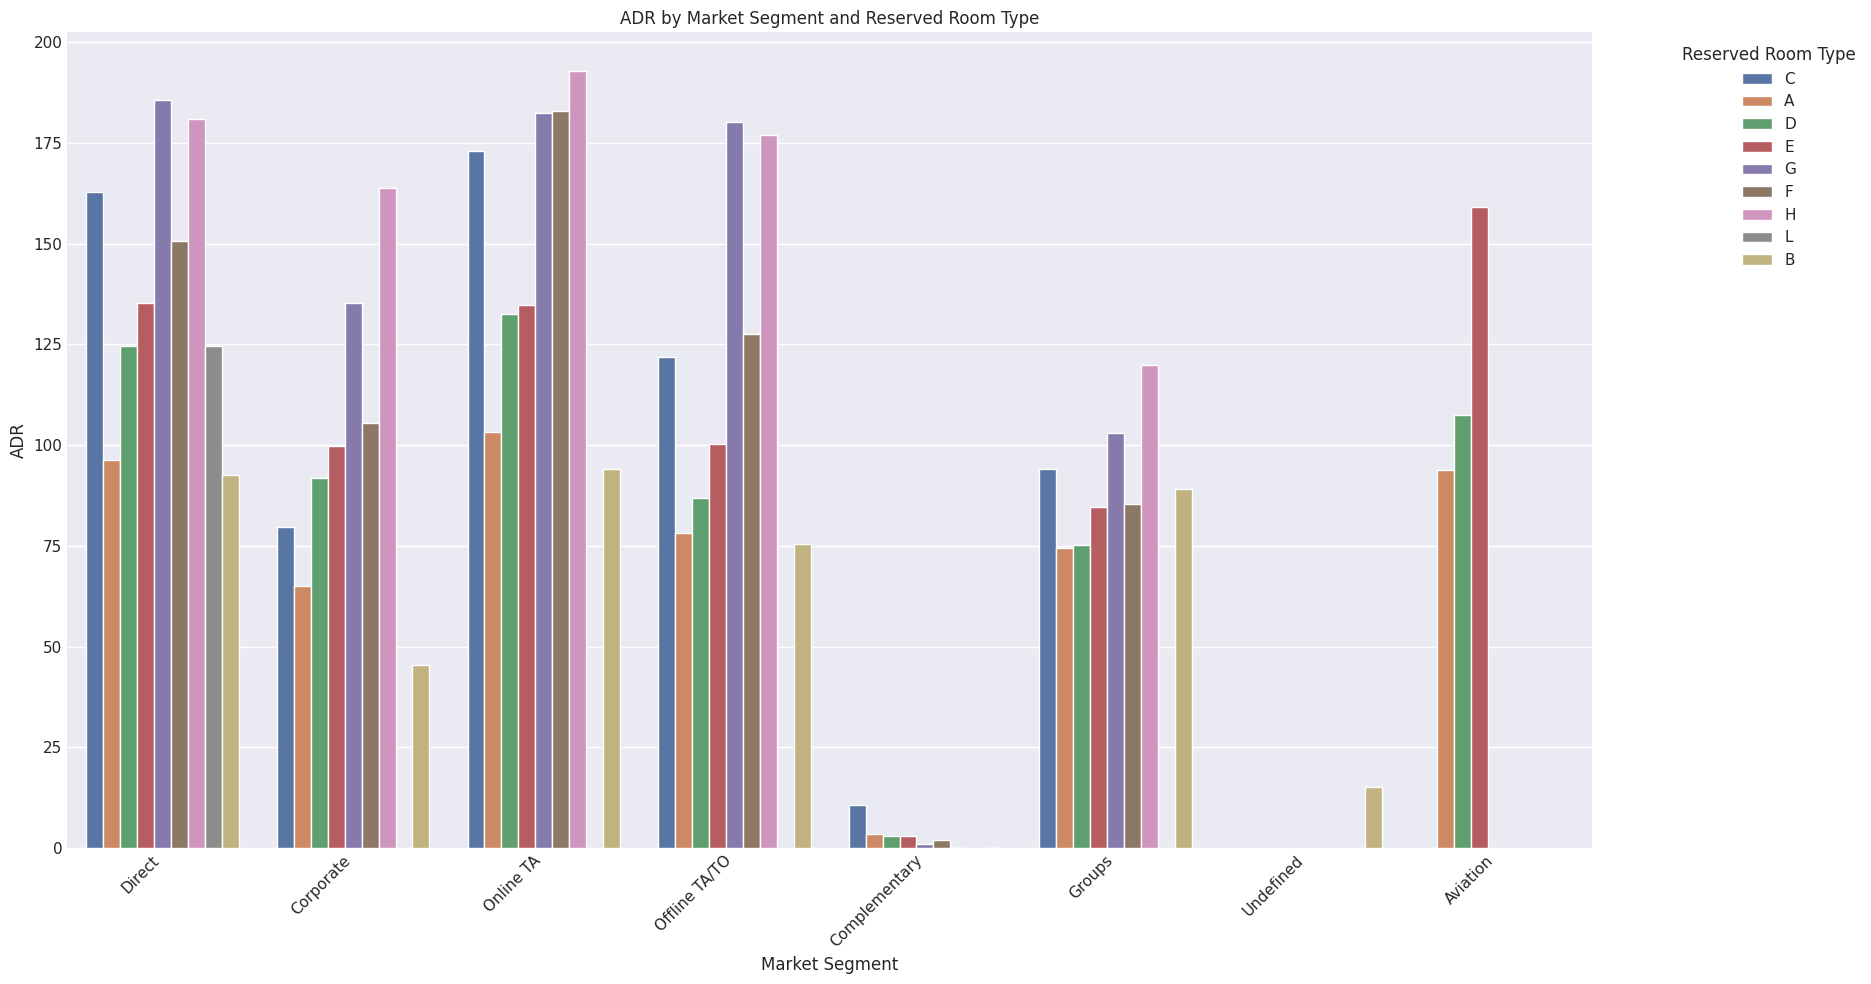

In [ ]:
# Create a smaller figure size
plt.figure(figsize=(20, 10))

# Create the barplot with adjusted width and dodge
fig = sns.barplot(x='market_segment', y='adr', hue='reserved_room_type', data=df, ci=None, dodge=True)

# Customize the appearance
sns.set_style("whitegrid")

# Set labels and title
plt.xlabel("Market Segment")
plt.ylabel("ADR")
plt.title("ADR by Market Segment and Reserved Room Type")

# Rotate and stagger x-axis labels
plt.xticks(rotation=45, ha="right")

# Create a separate legend figure and adjust its position
legend = plt.legend(title="Reserved Room Type", title_fontsize="12", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()

# Show the legend as a separate figure
plt.subplots_adjust(right=0.8)  # Adjust the right margin to make space for the legend
plt.show()

Bar graph to see when most of the booking were made

In [ ]:
# Creating new feature: `Weekday vs Weekend`

pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'

week_function(df['stays_in_weekend_nights'],df['stays_in_week_nights'], df)

Text(0, 0.5, 'Count')

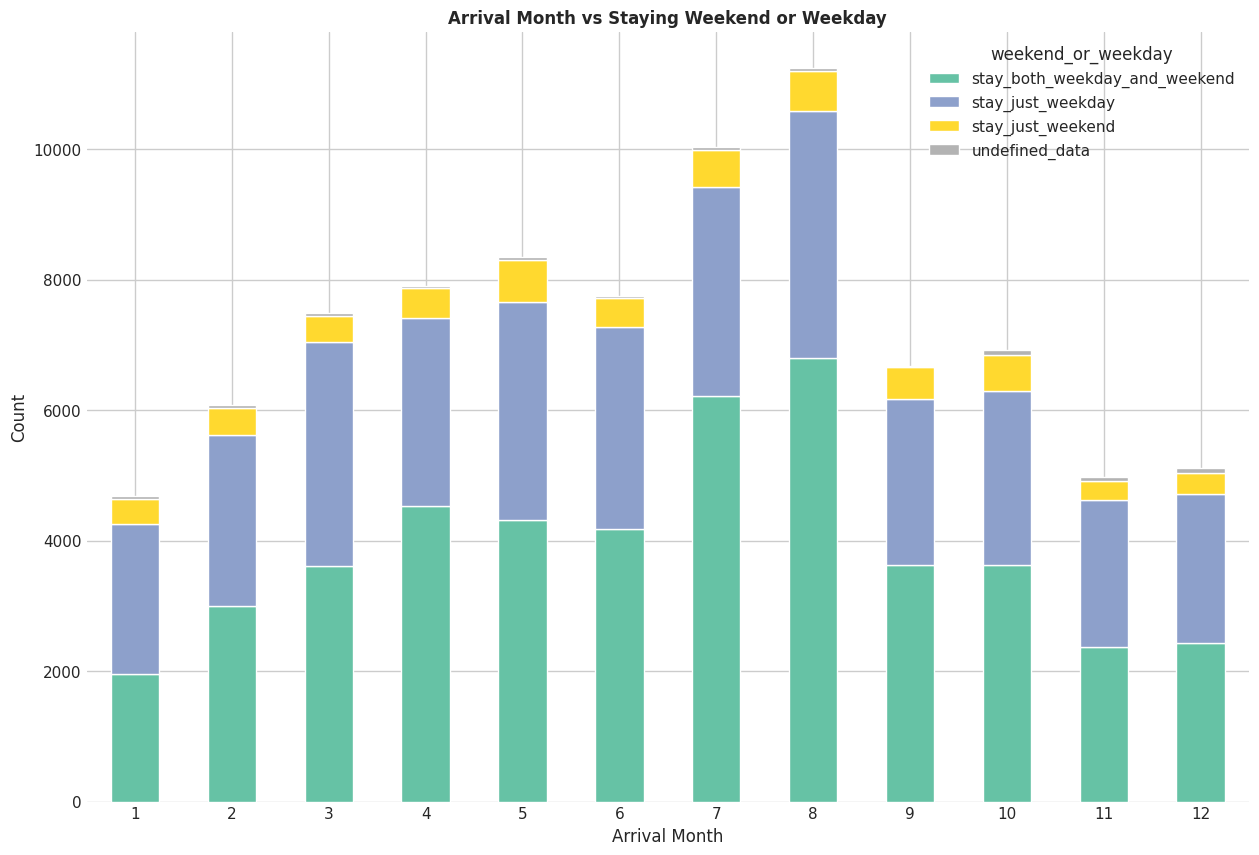

In [ ]:
#`arrival_date_month` vs `weekend_or_weekday` graph

df['arrival_date_month']= df['arrival_date_month'].astype('int64')
group_data = df.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set2',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

Average price per room

In [ ]:
df = df[df['is_canceled'] == 0]
px.box(data_frame = df, x = 'reserved_room_type', y = 'adr', color = 'hotel')

Number of stays in each hotel type

In [ ]:
df['total_night']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df

hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
87217    City Hotel            0         23               2017   
87218    City Hotel            0        102               2017   
87219    City Hotel            0         34               2017   
87220    City Hotel            0        109               2017   
87221    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                       7                        27   
1                       7                        27   
2                       7                        27   
3                       7                        27   
4                       7                        27   
...                   ...                       ...   
87217                   8                        35   
87218                   8                        35   
87219                   8                        35   
87220                   8                        35   
87221                   8                        35   

       arrival_date_day_of_month  stays_in_weekend_nights  \
0                              1                        0   
1                              1                        0   
2                              1                        0   
3                              1                        0   
4                              1                        0   
...                          ...                      ...   
87217                         30                        2   
87218                         31                        2   
87219                         31                        2   
87220                         31                        2   
87221                         29                        2   

       stays_in_week_nights  adults  ...  customer_type     adr  \
0                         0       2  ...      Transient    0.00   
1                         0       2  ...      Transient    0.00   
2                         1       1  ...      Transient   75.00   
3                         1       1  ...      Transient   75.00   
4                         2       2  ...      Transient   98.00   
...                     ...     ...  ...            ...     ...   
87217                     5       2  ...      Transient   96.14   
87218                     5       3  ...      Transient  225.43   
87219                     5       2  ...      Transient  157.71   
87220                     5       2  ...      Transient  104.40   
87221                     7       2  ...      Transient  151.20   

      required_car_parking_spaces total_of_special_requests  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         1   
...                           ...                       ...   
87217                           0                         0   
87218                           0                         2   
87219                           0                         4   
87220                           0                         0   
87221                           0                         2   

      reservation_status reservation_status_date  arrival_date  total_guests  \
0              Check-Out              2015-07-01      2015-7-1           2.0   
1              Check-Out              2015-07-01      2015-7-1           2.0   
2              Check-Out 

In [ ]:
stay = df.groupby(['total_night', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_night         hotel  Number of stays
0             0    City Hotel              231
1             0  Resort Hotel              360
2             1    City Hotel            10268
3             1  Resort Hotel             6894
4             2    City Hotel            10813
..          ...           ...              ...
68           46  Resort Hotel                1
69           48    City Hotel                1
70           56  Resort Hotel                2
71           60  Resort Hotel                1
72           69  Resort Hotel                1

[73 rows x 3 columns]

In [ ]:
px.bar(data_frame = stay, x = 'total_night', y = 'Number of stays', color = 'hotel', barmode = 'group')

### Identify Outliers using Visualization

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

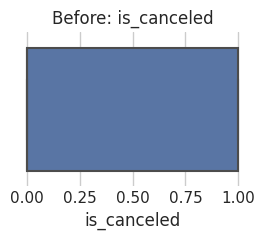

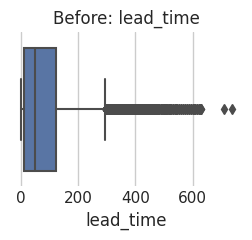

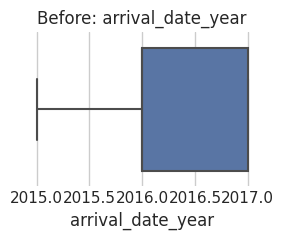

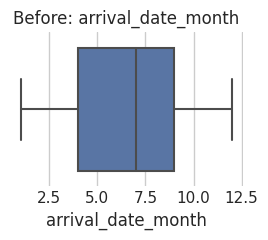

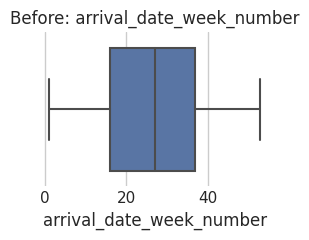

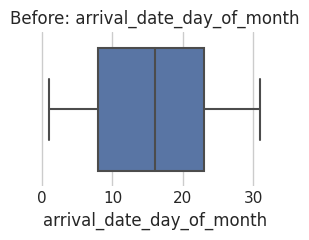

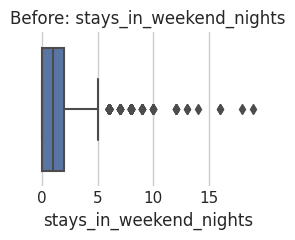

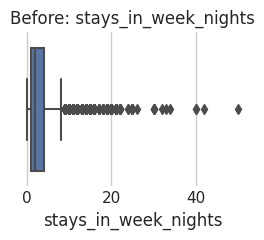

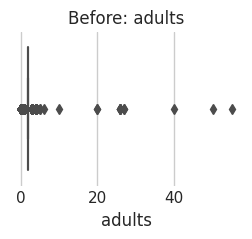

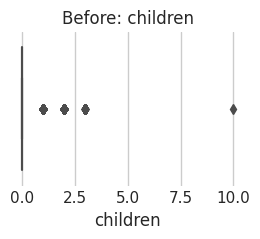

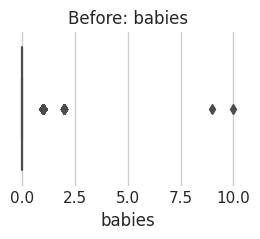

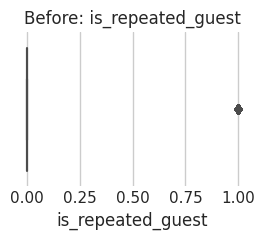

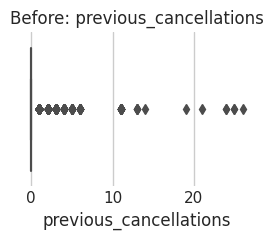

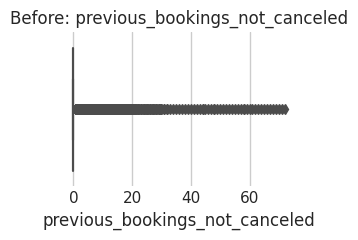

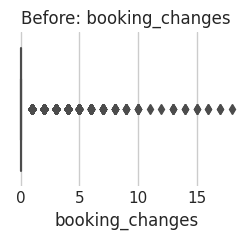

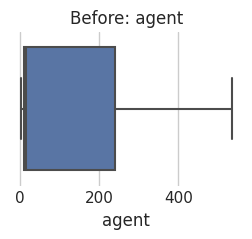

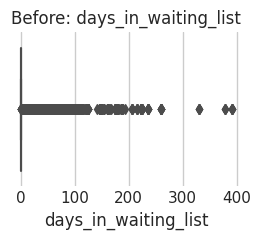

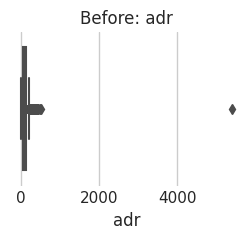

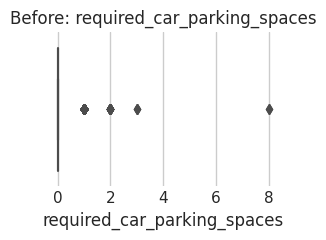

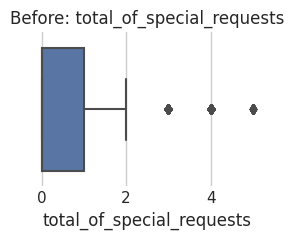

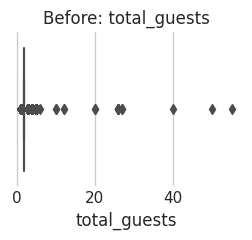

In [ ]:
# Numerical columns
cols = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_guests']

# Create a new figure for each box plot
for col in cols:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=df[col])
    plt.title(f'Before: {col}')
    plt.show()

#### Handling outliers using Z-score

In [ ]:
for col in cols:
    z_scores = np.abs(stats.zscore(df[col]))
    filtered_entries = (z_scores < 3)
    df = df[filtered_entries]

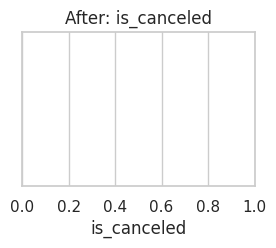

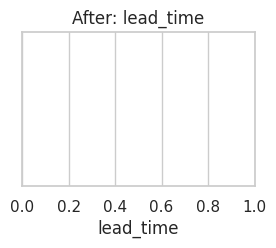

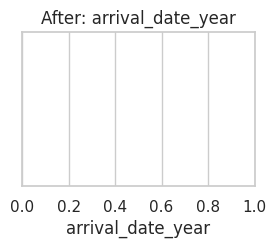

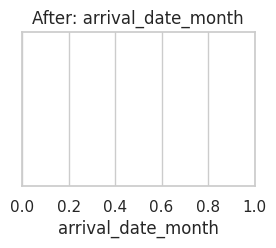

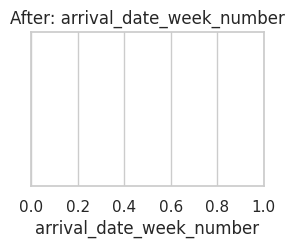

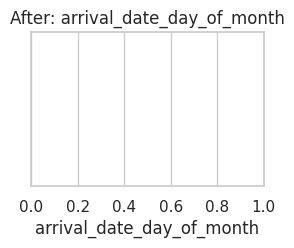

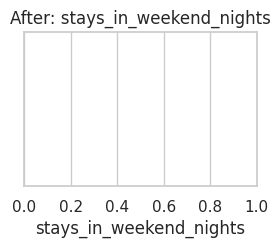

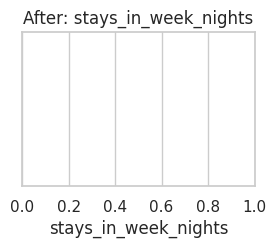

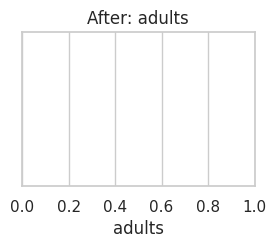

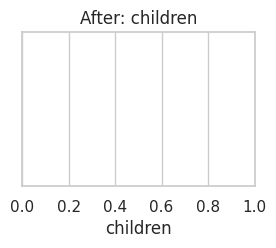

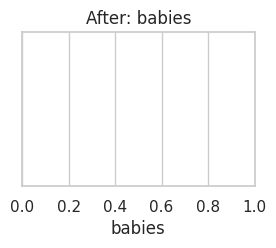

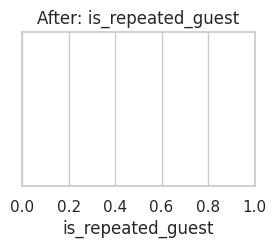

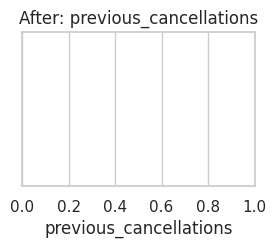

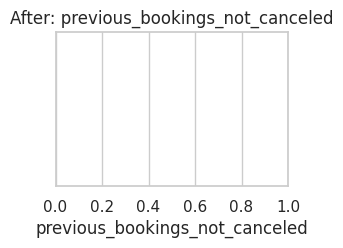

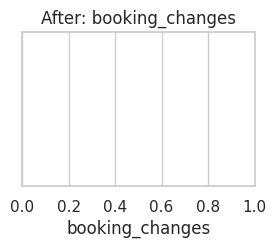

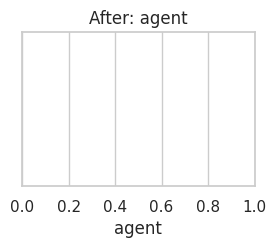

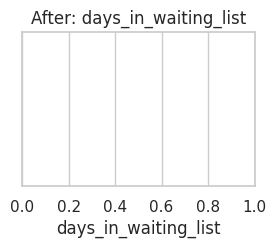

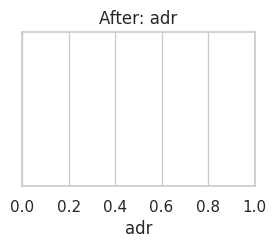

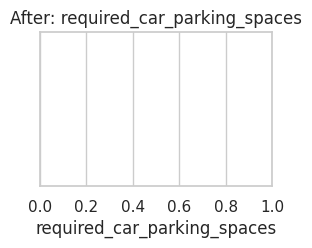

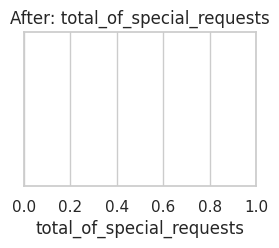

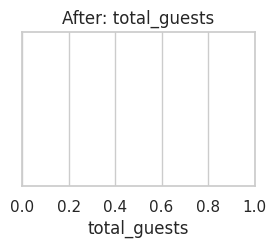

In [ ]:
# Box plot after handling outliers

# Create a new figure for each box plot
for col in cols:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=df[col])
    plt.title(f'After: {col}')
    plt.show()

# Data Preprocessing

<ipython-input-706-a18d83f2dc10>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



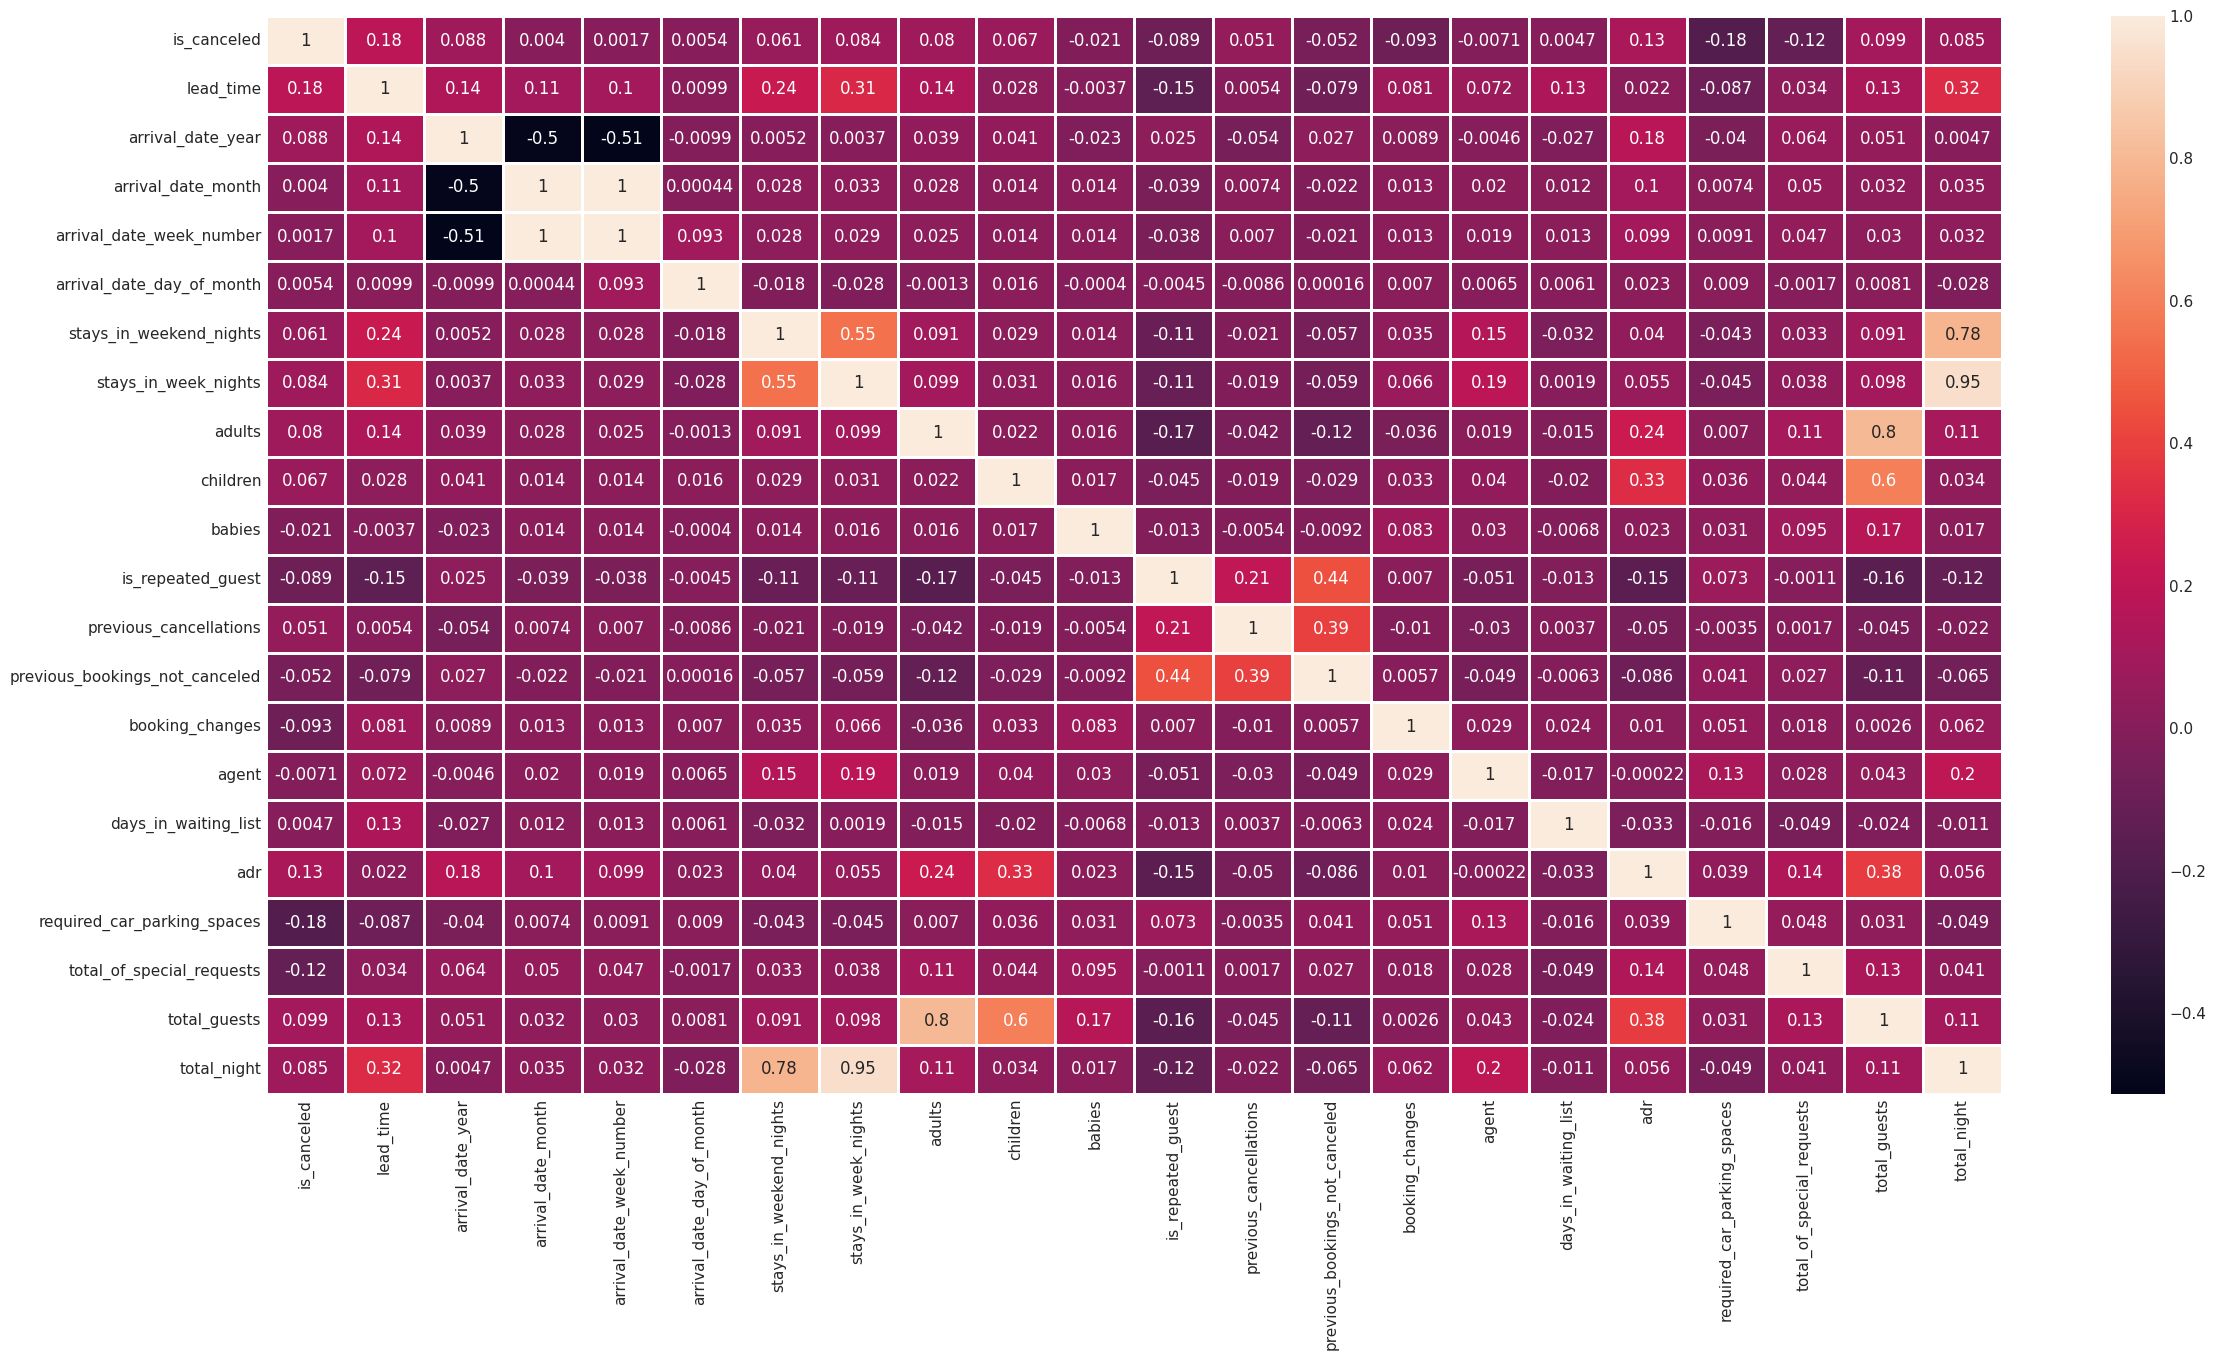

In [ ]:
plt.figure(figsize = (28, 14))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
#company not found here rest dropped

label = ['agent','total_of_special_requests','required_car_parking_spaces','booking_changes',
         'is_repeated_guest','reservation_status_date','stays_in_weekend_nights','stays_in_week_nights',
         'reserved_room_type','assigned_room_type','adults','children','babies']
df.drop(labels=label,axis=1,inplace=True)
df

hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
87217    City Hotel            0         23               2017   
87218    City Hotel            0        102               2017   
87219    City Hotel            0         34               2017   
87220    City Hotel            0        109               2017   
87221    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                       7                        27   
1                       7                        27   
2                       7                        27   
3                       7                        27   
4                       7                        27   
...                   ...                       ...   
87217                   8                        35   
87218                   8                        35   
87219                   8                        35   
87220                   8                        35   
87221                   8                        35   

       arrival_date_day_of_month meal country market_segment  ...  \
0                              1   BB     PRT         Direct  ...   
1                              1   BB     PRT         Direct  ...   
2                              1   BB     GBR         Direct  ...   
3                              1   BB     GBR      Corporate  ...   
4                              1   BB     GBR      Online TA  ...   
...                          ...  ...     ...            ...  ...   
87217                         30   BB     BEL  Offline TA/TO  ...   
87218                         31   BB     FRA      Online TA  ...   
87219                         31   BB     DEU      Online TA  ...   
87220                         31   BB     GBR      Online TA  ...   
87221                         29   HB     DEU      Online TA  ...   

      previous_bookings_not_canceled  deposit_type  days_in_waiting_list  \
0                                  0    No Deposit                     0   
1                                  0    No Deposit                     0   
2                                  0    No Deposit                     0   
3                                  0    No Deposit                     0   
4                                  0    No Deposit                     0   
...                              ...           ...                   ...   
87217                              0    No Deposit                     0   
87218                              0    No Deposit                     0   
87219                              0    No Deposit                     0   
87220                              0    No Deposit                     0   
87221                              0    No Deposit                     0   

      customer_type     adr reservation_status  arrival_date total_guests  \
0         Transient    0.00          Check-Out      2015-7-1          2.0   
1         Transient    0.00          Check-Out      2015-7-1          2.0   
2         Transient   75.00          Check-Out      2015-7-1          1.0   
3         Transient   75.00          Check-Out      2015-7-1          1.0   
4         Transient   98.00          Check-Out      2015-7-1          2.0   
...             ...     ...                ...           ...          ...   
87217     Transient   96.14          Check-Out     2017-8-30          2.0   
87218     Transient  225.43          Check-Out     2017-8-31          3.0   
87219     Transient  157.71          Check-Out     2017-8-31          2.0   
87220     Transient  104.40          Check-Out  

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
dtype: int64

# Data Transformation

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
reservation_status                 object
arrival_date                       object
total_guests                      float64
weekend_or_weekday                 object
total_night                         int64
dtype: object

In [ ]:
df.shape

(87222, 22)

### 'distribution_channel' one hot encoding

In [ ]:
df['distribution_channel'].nunique()

5

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
dtype: int64

In [ ]:
onehotencoder = OneHotEncoder()

one_hot_encoded = onehotencoder.fit_transform(df['distribution_channel'].values.reshape(-1,1))

one_hot_encoded_array = one_hot_encoded.toarray()

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=onehotencoder.categories_[0])

In [ ]:
# Set the index to match the original DataFrame
one_hot_encoded_df.index = df.index

# Perform concatenation
df = pd.concat([df, one_hot_encoded_df], axis=1)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
Corporate                         0
Direct                            0
GDS                               0
TA/TO                             0
Undefined                         0
dtype: int64

In [ ]:
df.shape

(87222, 27)

In [ ]:
df = df.drop(columns=['distribution_channel'])

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
Corporate                         0
Direct                            0
GDS                               0
TA/TO                             0
Undefined                         0
dtype: int64

### 'weekend_or_weekday' one hot encoding

In [ ]:
unique_values = df['weekend_or_weekday'].unique()

print(f"The unique values in the column 'weekend_or_weekday' are: {unique_values}")

The unique values in the column 'weekend_or_weekday' are: ['undefined_data' 'stay_just_weekday' 'stay_both_weekday_and_weekend'
 'stay_just_weekend']


In [ ]:
onehotencoder = OneHotEncoder()

one_hot_encoded = onehotencoder.fit_transform(df['weekend_or_weekday'].values.reshape(-1,1))

one_hot_encoded_array = one_hot_encoded.toarray()

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=onehotencoder.categories_[0])

In [ ]:
# Set the index to match the original DataFrame
one_hot_encoded_df.index = df.index

# Perform concatenation
df = pd.concat([df, one_hot_encoded_df], axis=1)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
Corporate                         0
Direct                            0
GDS                               0
TA/TO                             0
Undefined                         0
stay_both_weekday_and_weekend     0
stay_just_weekday           

In [ ]:
df = df.drop(columns=['weekend_or_weekday', 'undefined_data'])

### 'reservation_status' one hot encoding

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                               object
country                            object
market_segment                     object
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
reservation_status                 object
arrival_date                       object
total_guests                      float64
total_night                         int64
Corporate                         float64
Direct                            float64
GDS                               float64
TA/TO                             

In [ ]:
df['reservation_status'].nunique()

3

In [ ]:
nan_count = df['reservation_status'].isnull().sum()

print(f"The column 'reservation_status' has {nan_count} NaN values.")

The column 'reservation_status' has 0 NaN values.


In [ ]:
unique_values = df['reservation_status'].unique()

print(f"The unique values in the column 'reservation_status' are: {unique_values}")

The unique values in the column 'reservation_status' are: ['Check-Out' 'Canceled' 'No-Show']


In [ ]:
onehotencoder = OneHotEncoder()

one_hot_encoded = onehotencoder.fit_transform(df['reservation_status'].values.reshape(-1,1))

one_hot_encoded_array = one_hot_encoded.toarray()

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=onehotencoder.categories_[0])

In [ ]:
# Set the index to match the original DataFrame
one_hot_encoded_df.index = df.index

# Perform concatenation
df = pd.concat([df, one_hot_encoded_df], axis=1)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
total_night                       0
Corporate                         0
Direct                            0
GDS                               0
TA/TO                             0
Undefined                         0
stay_both_weekday_and_weekend     0
stay_just_weekday                 0
stay_just_weekend           

In [ ]:
df = df.drop(columns=['reservation_status'])

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                               object
country                            object
market_segment                     object
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
arrival_date                       object
total_guests                      float64
total_night                         int64
Corporate                         float64
Direct                            float64
GDS                               float64
TA/TO                             float64
Undefined                         

In [ ]:
df['arrival_date']

0         2015-7-1
1         2015-7-1
2         2015-7-1
3         2015-7-1
4         2015-7-1
           ...    
87217    2017-8-30
87218    2017-8-31
87219    2017-8-31
87220    2017-8-31
87221    2017-8-29
Name: arrival_date, Length: 87222, dtype: object

In [ ]:
df['arrival_date'].nunique()

793

In [ ]:
df.drop('arrival_date', axis=1, inplace=True)

In [ ]:
df.drop('Undefined', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_guests                      0
total_night                       0
Corporate                         0
Direct                            0
GDS                               0
TA/TO                             0
stay_both_weekday_and_weekend     0
stay_just_weekday                 0
stay_just_weekend                 0
Canceled                          0
Check-Out                         0
No-Show                     

# Dimensionality Reduction

## Deal with overfitting for highly correlated variables

In [ ]:
df = df.drop('Check-Out', axis=1)

the models' output was always fully dependent on 'check-out' feature, keeping this column would have been cheating. so we drop

In [ ]:
df = df.drop('Canceled', axis=1)

the models' output was always fully dependent also on 'canceled' feature, keeping this column would have been cheating. so we drop

In [ ]:
df = df.drop('No-Show', axis=1)

the models' output was always fully dependent also on 'no-show' feature, keeping this column would have been cheating. so we drop

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'total_guests', 'total_night', 'Corporate', 'Direct', 'GDS', 'TA/TO',
       'stay_both_weekday_and_weekend', 'stay_just_weekday',
       'stay_just_weekend'],
      dtype='object')

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                               object
country                            object
market_segment                     object
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
total_guests                      float64
total_night                         int64
Corporate                         float64
Direct                            float64
GDS                               float64
TA/TO                             float64
stay_both_weekday_and_weekend     float64
stay_just_weekday                 

## Chi-Squared

### 'country' and 'hotel'

In [ ]:
le = LabelEncoder()

# convert the categoric variables to numeric
df['country'] = le.fit_transform(df['country'])
df['hotel'] = le.fit_transform(df['hotel'])

In [ ]:
# chi square test
chi2_val, p_val = chi2(df['country'].values.reshape(-1, 1), df['hotel'])

print(f"Chi2 value: {chi2_val[0]}, p-value: {p_val[0]}")

Chi2 value: 45387.85165061774, p-value: 0.0


chi2 value is very large, this means 'country' and 'hotel' features are highly dependant.

### 'meal' and 'market_segment'

In [ ]:
le = LabelEncoder()

# convert the categoric variables to numeric
df['meal'] = le.fit_transform(df['meal'])
df['market_segment'] = le.fit_transform(df['market_segment'])

In [ ]:
# chi square test
chi2_val, p_val = chi2(df['meal'].values.reshape(-1, 1), df['market_segment'])

print(f"Chi2 value: {chi2_val[0]}, p-value: {p_val[0]}")

Chi2 value: 4638.3670280379365, p-value: 0.0


chi2 value is very large, this means 'meal' and 'market_segment' features are highly dependant.

### 'deposit_type' and 'customer_type'

In [ ]:
le = LabelEncoder()

# convert the categoric variables to numeric
df['deposit_type'] = le.fit_transform(df['deposit_type'])
df['customer_type'] = le.fit_transform(df['customer_type'])

In [ ]:
# chi square test
chi2_val, p_val = chi2(df['deposit_type'].values.reshape(-1, 1), df['customer_type'])

print(f"Chi2 value: {chi2_val[0]}, p-value: {p_val[0]}")

Chi2 value: 159.8429137527434, p-value: 1.981668506608031e-34


chi2 value is not that large this time, this means 'deposit_type' and 'customer_type' features are independant.

In [ ]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [ ]:
xtemp=X
ytemp=y
dftemp=df

In [ ]:
y.nunique()

2

## Standart Scaling

### Testing different models

In [ ]:
# Standardize the features
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_standardized.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0  1.25265    -0.616288   3.044716          -1.764244            0.169613   
1  1.25265    -0.616288   7.634604          -1.764244            0.169613   
2  1.25265    -0.616288  -0.847974          -1.764244            0.169613   
3  1.25265    -0.616288  -0.778254          -1.764244            0.169613   
4  1.25265    -0.616288  -0.766634          -1.764244            0.169613   

   arrival_date_week_number  arrival_date_day_of_month      meal   country  \
0                  0.012092                  -1.676872 -0.516097  1.064329   
1                  0.012092                  -1.676872 -0.516097  1.064329   
2                  0.012092                  -1.676872 -0.516097 -0.622574   
3                  0.012092                  -1.676872 -0.516097 -0.622574   
4                  0.012092                  -1.676872 -0.516097 -0.622574   

   market_segment  ...       adr  total_guests  total_night  Corporate  \
0       -1.544113  ... -1.940664     -0.036914    -1.322946  -0.248112   
1       -1.544113  ... -1.940664     -0.036914    -1.322946  -0.248112   
2       -1.544113  ... -0.574271     -1.302521    -0.958365  -0.248112   
3       -2.288077  ... -0.574271     -1.302521    -0.958365   4.030430   
4        0.687780  ... -0.155244     -0.036914    -0.593783  -0.248112   

     Direct       GDS     TA/TO  stay_both_weekday_and_weekend  \
0  2.394521 -0.045601 -1.947616                      -1.072291   
1  2.394521 -0.045601 -1.947616                      -1.072291   
2  2.394521 -0.045601 -1.947616                      -1.072291   
3 -0.417620 -0.045601 -1.947616                      -1.072291   
4 -0.417620 -0.045601  0.513448                      -1.072291   

   stay_just_weekday  stay_just_weekend  
0          -0.808198          -0.259903  
1          -0.808198          -0.259903  
2           1.237320          -0.259903  
3           1.237320          -0.259903  
4           1.237320          -0.259903  

[5 rows x 25 columns]

In [ ]:
X_standardized = df_standardized

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Regressor
tree_regressor = DecisionTreeClassifier()
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.0


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")

Mean Squared Error on Test Set (Logistic Regression): 0.0


In [ ]:
# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (SVM): {mse}")

Mean Squared Error on Test Set (SVM): 0.0006305531670965892


In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (Random Forests): {mse}")

Mean Squared Error on Test Set (Random Forests): 0.0


## Min-Max Scaling

In [ ]:
# Min-Max scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
# Determine the number of rows and columns for your subplots
n = len(df.columns)
ncols = 3
nrows = n // ncols
nrows += n % ncols
position = range(1,n + 1)

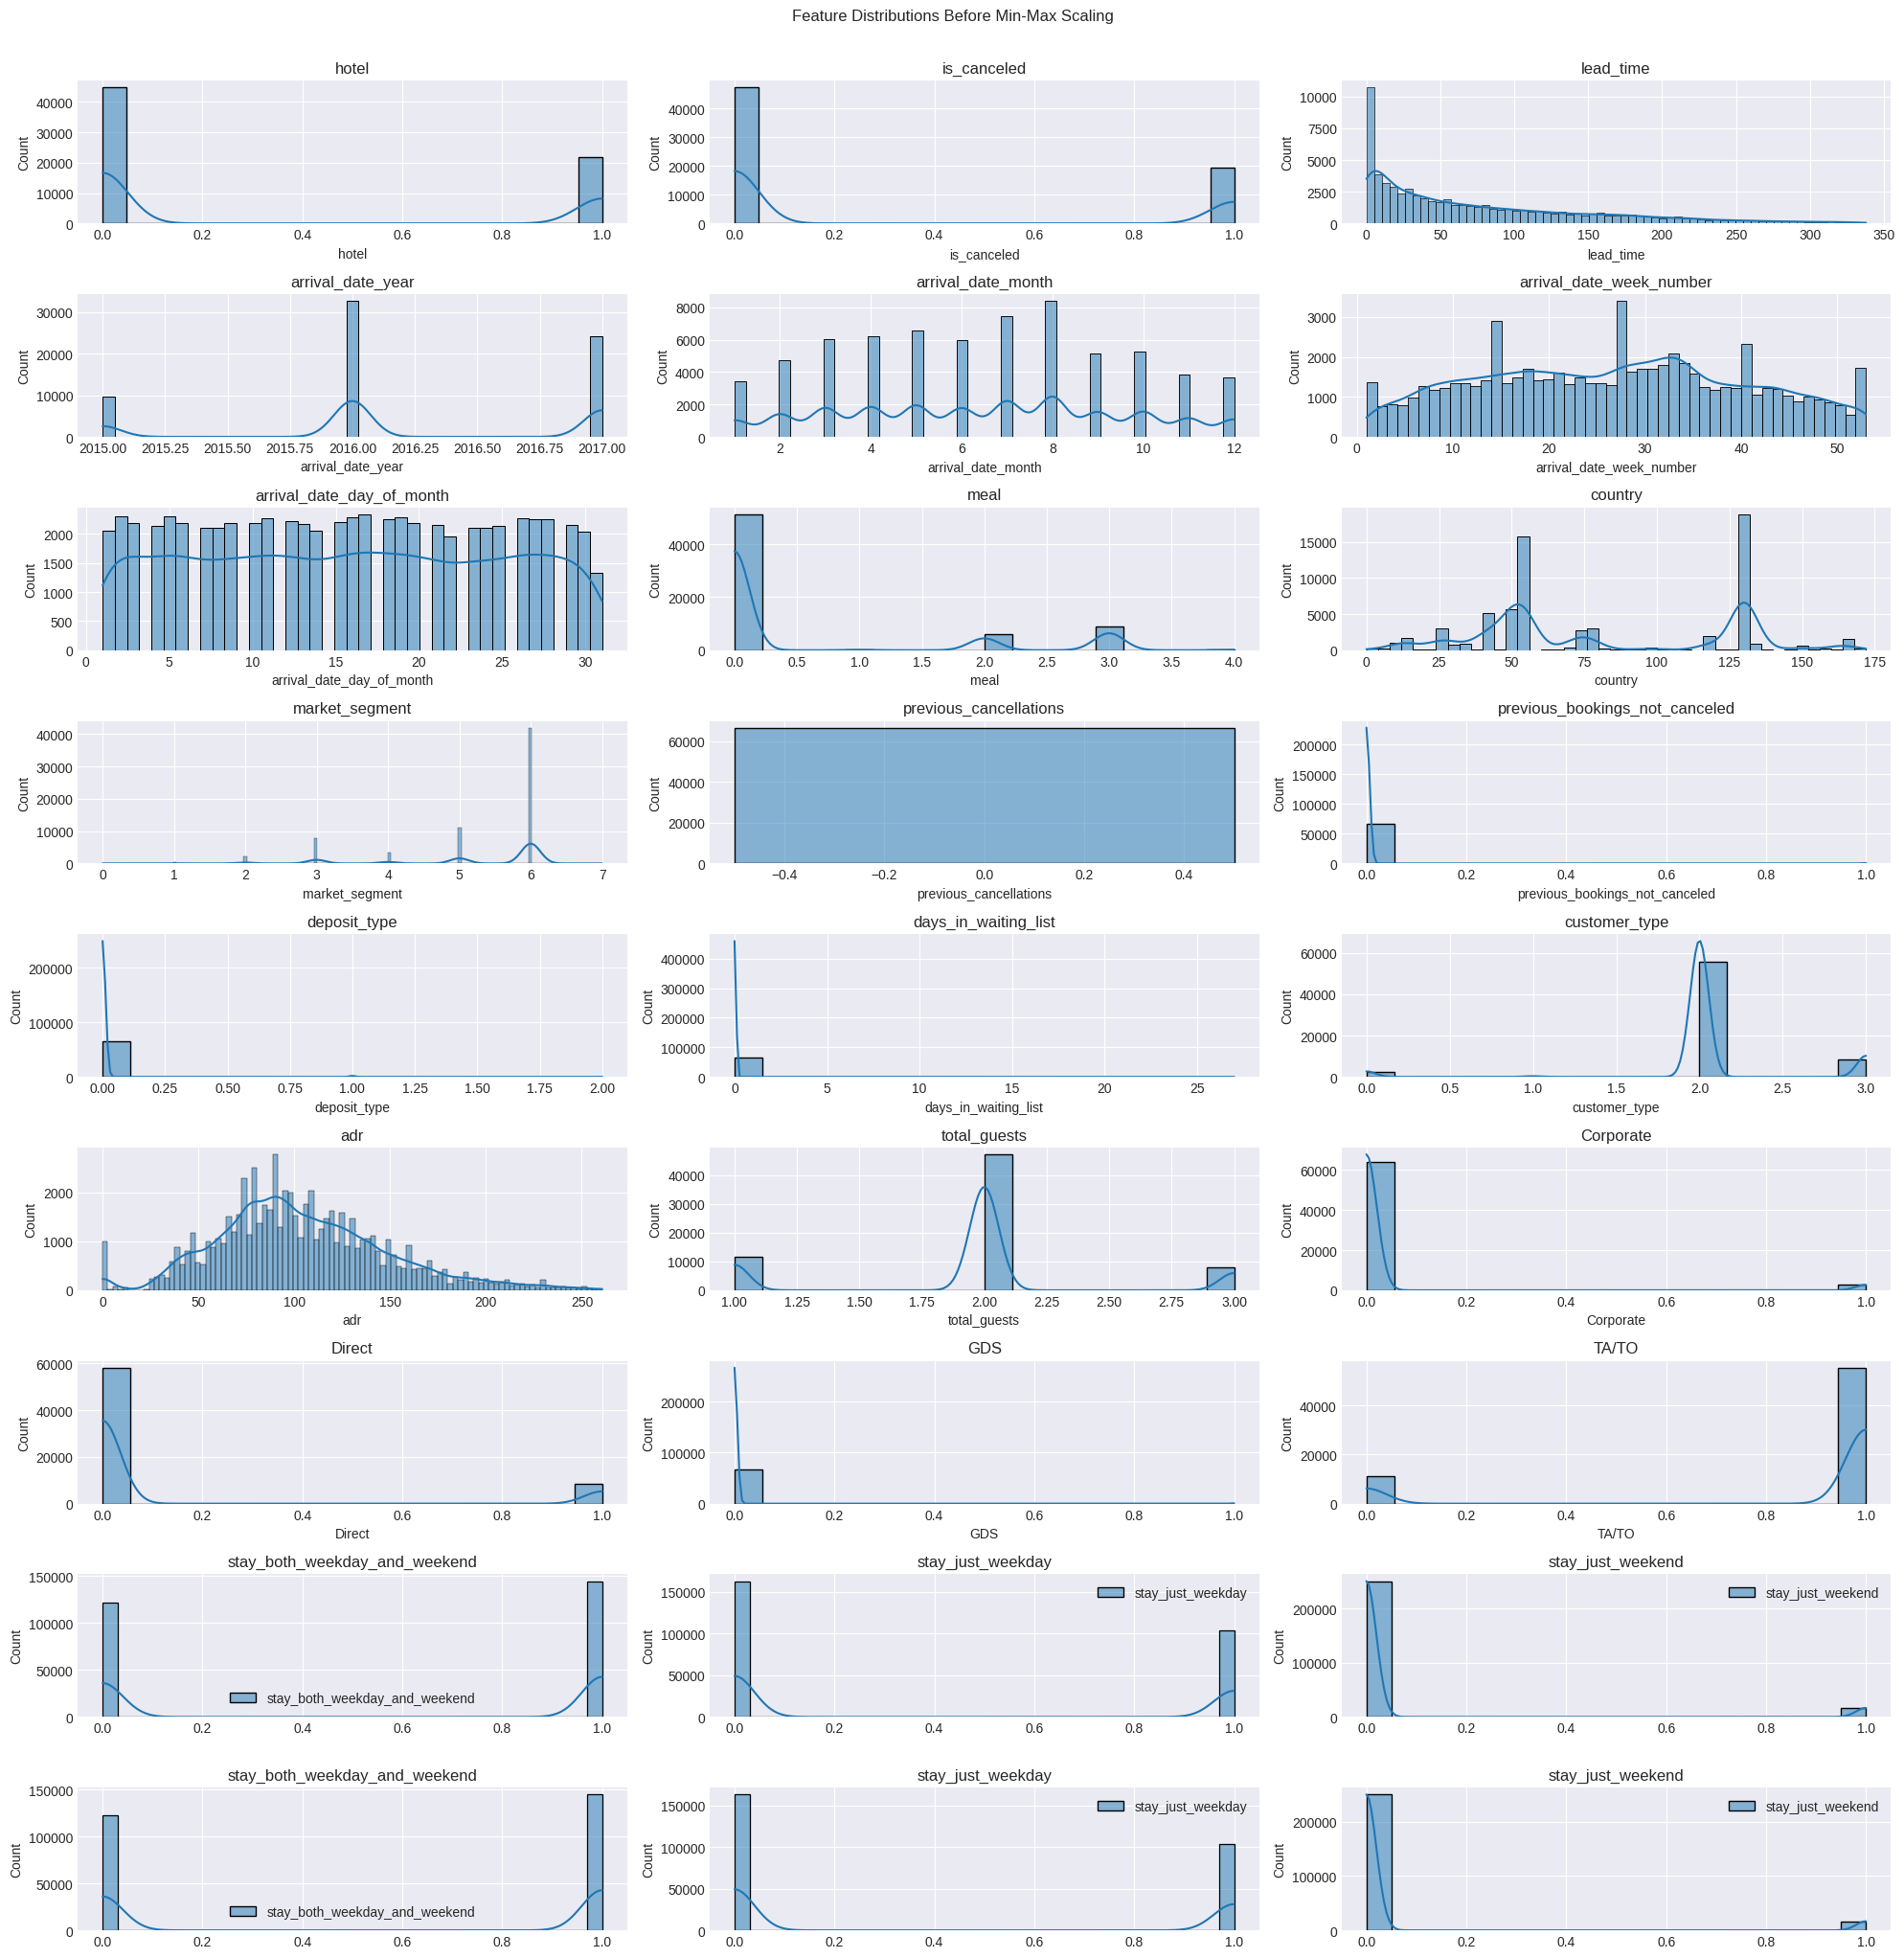

In [ ]:
# Create subplots
fig = plt.figure(figsize=(20, 20))

# Before scaling
for k, column in zip(range(n), df.columns):
    ax = fig.add_subplot(nrows, ncols, position[k])
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.suptitle("Feature Distributions Before Min-Max Scaling", y=1.02)
plt.show()

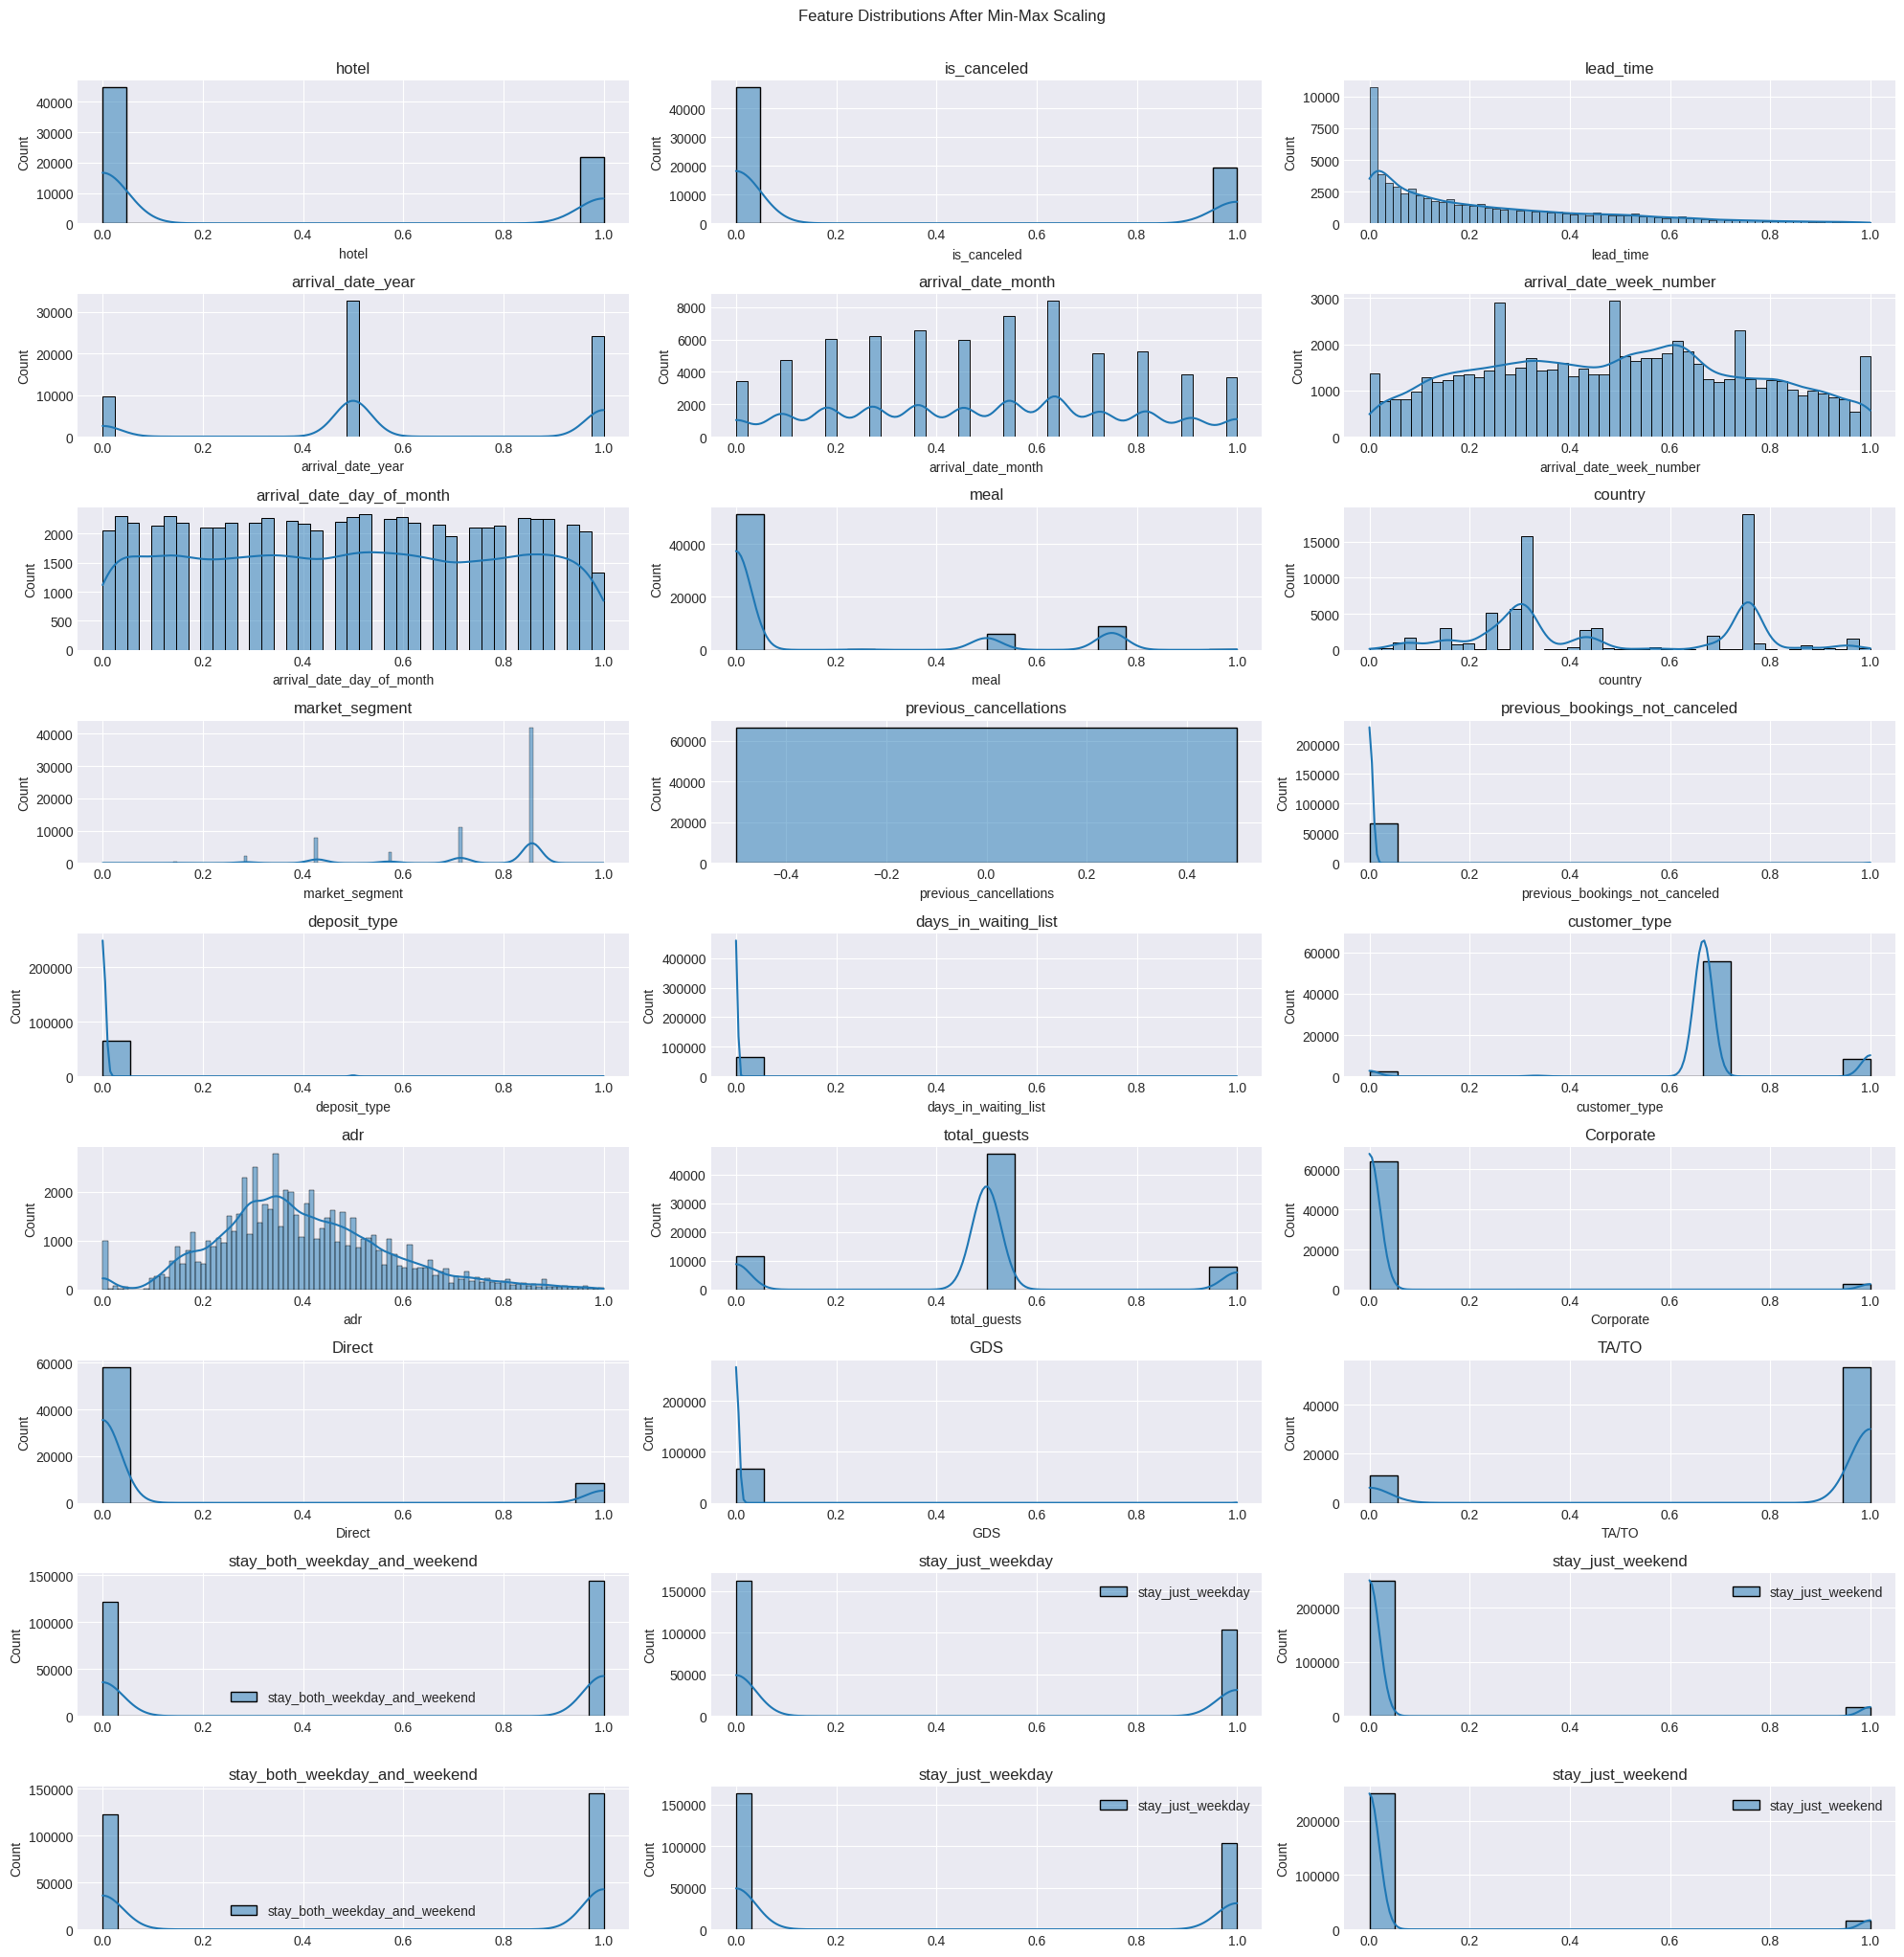

In [ ]:
# After scaling
fig = plt.figure(figsize=(20, 20))

for k, column in zip(range(n), df_normalized.columns):
    ax = fig.add_subplot(nrows, ncols, position[k])
    sns.histplot(df_normalized[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.suptitle("Feature Distributions After Min-Max Scaling", y=1.02)
plt.show()

### Testing different models

In [ ]:
X_normalized = df_normalized

In [ ]:
# split the selected data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Regressor
tree_regressor = DecisionTreeClassifier()
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.0


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")

Mean Squared Error on Test Set (Logistic Regression): 0.0


In [ ]:
# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (SVM): {mse}")

Mean Squared Error on Test Set (SVM): 0.0


In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (Random Forests): {mse}")

Mean Squared Error on Test Set (Random Forests): 0.0


## PCA and Standart Scaling

In [ ]:
df.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                                int64
country                             int64
market_segment                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                        int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
total_guests                      float64
Corporate                         float64
Direct                            float64
GDS                               float64
TA/TO                             float64
stay_both_weekday_and_weekend     float64
stay_just_weekday                 float64
stay_just_weekend                 

In [ ]:
# Standardize the features
features = StandardScaler().fit_transform(df)

In [ ]:
# Apply PCA
pca = PCA()
components = pca.fit_transform(features)

In [ ]:
df

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2          1            0          7               2015                   7   
3          1            0         13               2015                   7   
4          1            0         14               2015                   7   
5          1            0          0               2015                   7   
6          1            0          9               2015                   7   
...      ...          ...        ...                ...                 ...   
87216      0            0         21               2017                   8   
87217      0            0         23               2017                   8   
87218      0            0        102               2017                   8   
87220      0            0        109               2017                   8   
87221      0            0        205               2017                   8   

       arrival_date_week_number  arrival_date_day_of_month  meal  country  \
2                            27                          1     0       55   
3                            27                          1     0       55   
4                            27                          1     0       55   
5                            27                          1     0      130   
6                            27                          1     1      130   
...                         ...                        ...   ...      ...   
87216                        35                         30     0       14   
87217                        35                         30     0       14   
87218                        35                         31     0       52   
87220                        35                         31     0       55   
87221                        35                         29     2       41   

       market_segment  ...  total_guests  total_night  Corporate  Direct  GDS  \
2                   3  ...           1.0            1        0.0     1.0  0.0   
3                   2  ...           1.0            1        1.0     0.0  0.0   
4                   6  ...           2.0            2        0.0     0.0  0.0   
5                   3  ...           2.0            2        0.0     1.0  0.0   
6                   3  ...           2.0            2        0.0     1.0  0.0   
...               ...  ...           ...          ...        ...     ...  ...   
87216               5  ...           2.0            7        0.0     0.0  0.0   
87217               5  ...           2.0            7        0.0     0.0  0.0   
87218               6  ...           3.0            7        0.0     0.0  0.0   
87220               6  ...           2.0            7        0.0     0.0  0.0   
87221               6  ...           2.0            9        0.0     0.0  0.0   

       TA/TO  stay_both_weekday_and_weekend  stay_just_weekday  \
2        0.0                            0.0                1.0   
3        0.0                            0.0                1.0   
4        1.0                            0.0                1.0   
5        0.0                            0.0                1.0   
6        0.0                            0.0                1.0   
...      ...                            ...                ...   
87216    1.0                            1.0                0.0   
87217    1.0                            1.0                0.0   
87218    1.0                            1.0                0.0   
87220    1.0                            1.0                0.0   
87221    1.0                            1.0                0.0   

       stay_just_weekend  No-Show  
2                    0.0      0.0  
3                    0.0      0.0  
4                    0.0      0.0  
5                    0.0      0.0  
6                    0.0      0.0  
...                  ...      ...  
87216                0.0      0.0  
87217                0.0      0.0  
87218                0.0      0.0  
87220  

In [ ]:
# Creating a DataFrame with the principal components
principalDf = pd.DataFrame(data=components)

principalDf.head()

0         1         2         3         4         5         6   \
0 -2.808654  1.188722  1.814150  0.161681  0.583738 -1.809814 -1.269716   
1 -1.937491  1.512992  2.590929 -0.434406  2.440054 -2.813060 -0.937045   
2 -3.616547  0.653528 -0.049483  1.362125 -0.818972 -0.814463 -0.777353   
3 -4.340589  0.638590 -0.699204 -1.110823 -1.121371 -0.545848 -0.146116   
4 -0.086296  0.615345 -1.707091  0.294420 -1.127920 -0.299167 -1.378848   

         7         8         9   ...        14        15        16        17  \
0 -0.210728  1.009795  1.842981  ...  0.744279 -1.282476 -1.355209  1.625354   
1 -0.701232  0.928812  1.963458  ...  0.633105 -2.444918 -3.150549  2.605824   
2 -0.762799  1.163353  1.703038  ...  0.654689 -0.327789  1.077271 -0.667962   
3 -1.269875  0.394087  0.761583  ... -1.502969  0.646758  1.888921  0.479250   
4 -0.802187  0.373937  1.448461  ...  0.360004  0.596826  1.083847 -0.106057   

         18        19        20        21        22        23  
0 -0.055060  1.386409 -0.472821  1.309345 -0.023026 -0.000607  
1  0.517059  3.086678 -0.661754  1.334282 -0.019935 -0.000382  
2 -0.194249  1.014822 -0.144835 -0.011853 -0.021777 -0.000717  
3  1.010520  1.094918  0.065772  0.002606 -0.025331 -0.000552  
4 -0.224267  0.832853 -0.171935 -0.008683 -0.022385 -0.000712  

[5 rows x 24 columns]

In [ ]:
# Calculate cumulative sum of explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Print out the cumulative sum of explained variance
print(cumulative_variance_ratio)

[0.14176502 0.24510067 0.3371914  0.400241   0.45501387 0.50535695
 0.55288044 0.59723932 0.64040863 0.68215773 0.72341199 0.76367149
 0.80197474 0.83836711 0.87338413 0.90540243 0.93366619 0.96049358
 0.97861656 0.99342451 0.99961986 0.99997513 0.99999151 1.
 1.        ]


In [ ]:
# Find the number of components for a cumulative variance of 95% (or any other desired threshold)
components95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print('Number of components needed to explain 95% variance: ', components95)

Number of components needed to explain 95% variance:  18


## Recursive Feature Elimination

In [ ]:
X.dtypes

hotel                               int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                                int64
country                             int64
market_segment                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                        int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
total_guests                      float64
total_night                         int64
Corporate                         float64
Direct                            float64
GDS                               float64
TA/TO                             float64
stay_both_weekday_and_weekend     float64
stay_just_weekday                 float64
stay_just_weekend                 

In [ ]:
model = DecisionTreeClassifier()
rfecv = RFECV(estimator=model, step=1, cv=5)
rfecv.fit(X, y)

print(f"Mask of selected features: {rfecv.support_}")
print(f"Feature ranking: {rfecv.ranking_}")
print(f"Number of selected features: {rfecv.n_features_}")

# Get feature names
feature_names = X.columns

# Print feature names with their ranking
for rank, name in sorted(zip(rfecv.ranking_, feature_names)):
    print(f"Rank: {rank}, Feature: {name}")

X_selected = rfecv.transform(X)

Mask of selected features: [False  True False False False False False False False False False False
 False False False False False False False False False False False False]
Feature ranking: [16  1  8 10  5  3 14  4  7 15 17 12 23 11  2  9  6 22 20 24 21 18 13 19]
Number of selected features: 1
Rank: 1, Feature: lead_time
Rank: 2, Feature: adr
Rank: 3, Feature: arrival_date_day_of_month
Rank: 4, Feature: country
Rank: 5, Feature: arrival_date_week_number
Rank: 6, Feature: total_night
Rank: 7, Feature: market_segment
Rank: 8, Feature: arrival_date_year
Rank: 9, Feature: total_guests
Rank: 10, Feature: arrival_date_month
Rank: 11, Feature: customer_type
Rank: 12, Feature: deposit_type
Rank: 13, Feature: stay_just_weekday
Rank: 14, Feature: meal
Rank: 15, Feature: previous_cancellations
Rank: 16, Feature: hotel
Rank: 17, Feature: previous_bookings_not_canceled
Rank: 18, Feature: stay_both_weekday_and_weekend
Rank: 19, Feature: stay_just_weekend
Rank: 20, Feature: Direct
Rank: 21, Feature:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X_scaled, y)


X_selected = X.columns[rfe.support_]

# Display the selected features
print("Top 3 selected features:", X_selected)

Top 3 selected features: Index(['market_segment', 'previous_cancellations',
       'previous_bookings_not_canceled'],
      dtype='object')


### Testing different models

In [ ]:
X_selected_data = X[X_selected]

# split the selected data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")
print(f"Accuracy on Test Set: {accuracy}")
print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")
print(f"F1 Score on Test Set: {f1}")
print(f"ROC AUC Score on Test Set: {roc_auc}")

Accuracy on Test Set: 0.7467469188879335
Precision on Test Set: 0.5404307192198293
Recall on Test Set: 0.5523255813953488
F1 Score on Test Set: 0.5463134113781064
ROC AUC Score on Test Set: 0.686607006391712


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")
print(f"Accuracy on Test Set: {accuracy}")
print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")
print(f"F1 Score on Test Set: {f1}")
print(f"ROC AUC Score on Test Set: {roc_auc}")

Mean Squared Error on Test Set (Logistic Regression): 0.2530811120664947
Accuracy on Test Set: 0.7469188879335052
Precision on Test Set: 0.6378006872852233
Recall on Test Set: 0.19269102990033224
F1 Score on Test Set: 0.29596555573273803
ROC AUC Score on Test Set: 0.5754808384120396


In [ ]:
# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")
print(f"Accuracy on Test Set: {accuracy}")
print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")
print(f"F1 Score on Test Set: {f1}")
print(f"ROC AUC Score on Test Set: {roc_auc}")

Mean Squared Error on Test Set (Logistic Regression): 0.2760676411579249
Accuracy on Test Set: 0.7239323588420751
Precision on Test Set: 0.0
Recall on Test Set: 0.0
F1 Score on Test Set: 0.0
ROC AUC Score on Test Set: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")
print(f"Accuracy on Test Set: {accuracy}")
print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")
print(f"F1 Score on Test Set: {f1}")
print(f"ROC AUC Score on Test Set: {roc_auc}")

Mean Squared Error on Test Set (Logistic Regression): 0.2053310404127257
Accuracy on Test Set: 0.7946689595872742
Precision on Test Set: 0.6710088691796009
Recall on Test Set: 0.5026993355481728
F1 Score on Test Set: 0.5747863247863247
ROC AUC Score on Test Set: 0.7043546562925755


Random forest performs best among these models.

### Linear combination

there is 3 features selected by recursive feature elimination. so proceed with creating a linear model using these features. The linear model looks like:

Linear Model = w1 x 'market_segment' + w2 x 'lead_time' + w3 x 'country' + b

In [ ]:
df.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                                int64
country                             int64
market_segment                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                        int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
total_guests                      float64
total_night                         int64
Corporate                         float64
Direct                            float64
GDS                               float64
TA/TO                             float64
stay_both_weekday_and_weekend     float64
stay_just_weekday                 

In [ ]:
# Create a linear combination
X['linear_combination'] = X['lead_time'] + X['country'] + X['market_segment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18399940712575277


In [ ]:
model = LGBMClassifier(random_state = 111, class_weight = "balanced", max_depth=2)
model.fit(X_train, y_train)

y_train_pred_proba = model.predict_proba(X_train)[:, 1]

y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Performance on training set
print('Training ROC AUC : ', roc_auc_score(y_train, y_train_pred_proba).round(2))

# Performance on test set
print('Testing ROC AUC : ', roc_auc_score(y_test, y_test_pred_proba).round(2))

[LightGBM] [Info] Number of positive: 15648, number of negative: 37749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 53397, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training ROC AUC :  0.79
Testing ROC AUC :  0.8


### Understanding the Model

In [ ]:
# Get feature importances (gain) as an array
feature_importance = model.booster_.feature_importance(importance_type='gain')

# Get the names of your features
feature_names = model.booster_.feature_name()

# Create a dictionary to associate feature names with their importances
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the dictionary by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances for plotting
features, importances = zip(*sorted_feature_importance)
# Create a bar plot for feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Features')
plt.title('Feature Importance in LightGBM Model')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

AttributeError: ignored

##SVD

In [ ]:
# Select numeric features
numeric_features = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Apply SVD
svd = TruncatedSVD(n_components=3)  # You can choose the desired number of components
svd_result = svd.fit_transform(scaled_features)

# Create a DataFrame with the SVD results
svd_df = pd.DataFrame(data=svd_result, columns=['SVD_Component_1', 'SVD_Component_2', 'SVD_Component_3'])

# Concatenate the SVD results with the target variable
final_df = pd.concat([svd_df, df['is_canceled']], axis=1)

# Display the final DataFrame
print(final_df.head())

   SVD_Component_1  SVD_Component_2  SVD_Component_3  is_canceled
0         4.444335         0.930198         0.146042          NaN
1         5.065755         1.089936         0.054873          NaN
2         0.562115        -0.020100        -1.749770          0.0
3         4.137744         1.114445         0.215141          0.0
4         4.043573         1.039906         0.177125          0.0


#Sampling Data

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Initialize individual classifiers
classifier1 = RandomForestClassifier(random_state=42)
classifier2 = LogisticRegression(random_state=42, max_iter=1000)
classifier3 = SVC(probability=True, random_state=42)
classifier4 = DecisionTreeClassifier(random_state=42)

# Create a list of classifiers for comparison
classifiers = [('Random Forest', classifier1), ('Logistic Regression', classifier2), ('SVM', classifier3), ('Decision Tree', classifier4)]

NameError: ignored

In [ ]:
# Set up K-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compare models and print metrics
best_model = None
best_accuracy = 0

## Random Sampling


In [ ]:
random_sample_df = df.sample(n=100, random_state=42)

In [ ]:
random_sample_df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
83416      0            0        170               2017                   6   
55414      0            0          6               2015                  11   
77113      0            0          6               2017                   3   
35123      0            0          1               2015                   9   
48866      0            1         20               2017                   5   

       arrival_date_week_number  arrival_date_day_of_month  meal  country  \
83416                        25                         24     0       59   
55414                        46                         11     0      135   
77113                        10                          9     2       51   
35123                        36                          1     0      135   
48866                        18                          3     0      135   

       market_segment  ...    adr  total_guests  total_night  Corporate  \
83416               6  ...  130.5           2.0            4        0.0   
55414               6  ...    0.0           2.0            0        0.0   
77113               6  ...   94.4           1.0            1        0.0   
35123               6  ...  105.0           2.0            1        0.0   
48866               6  ...  130.0           1.0            2        0.0   

       Direct  GDS  TA/TO  stay_both_weekday_and_weekend  stay_just_weekday  \
83416     0.0  0.0    1.0                            1.0                0.0   
55414     0.0  0.0    1.0                            0.0                0.0   
77113     0.0  0.0    1.0                            0.0                1.0   
35123     0.0  0.0    1.0                            0.0                1.0   
48866     0.0  0.0    1.0                            0.0                1.0   

       stay_just_weekend  
83416                0.0  
55414                0.0  
77113                0.0  
35123                0.0  
48866                0.0  

[5 rows x 25 columns]

In [ ]:
X1 = random_sample_df.drop('is_canceled', axis=1)
y1 = random_sample_df['is_canceled']

In [ ]:
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

#FASTER THAN GRID SAME ACCURACY LESS FOLD LESS CV
from sklearn.model_selection import RandomizedSearchCV

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in RandomizedSearchCV
f1 = make_scorer(f1_score)

# Convert param_grid to param_dist for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the model, parameter distributions, and scoring metric
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring=f1,
    cv=3,
    verbose=2,
    n_jobs=-1,
    n_iter=10  # Adjust the number of iterations based on your preferences
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_res, y_res)

# Get the best parameters
best_params = random_search.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in GridSearchCV
f1 = make_scorer(f1_score)

# Initialize GridSearchCV with the model, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=f1, cv=3, verbose=2, n_jobs=-1)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit GridSearchCV on the resampled data
grid_search.fit(X_res, y_res)

# Get the best parameters
best_params = grid_search.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KeyboardInterrupt: ignored

In [ ]:
# Train a new Random Forest model on the resampled data using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_res, y_res)

# Make predictions on the test data
predictions = best_rf.predict(X_test)

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.6201830955929316
Recall: 0.604858803986711
F1-score: 0.6124251024913276


KeyboardInterrupt: ignored

In [ ]:

#BEST MODEL FOR RANDOM SAMPLING
for clf_name, clf in classifiers:
    fold_accuracies = []
    fold_confusion_matrices = []

    for train_index, test_index in kf.split(x1):
        X_train, X_test = x1.iloc[train_index], x1.iloc[test_index]
        y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

        # Fit the model on the training data
        clf.fit(X_train, y_train)

        # Make predictions on the test data
        predictions = clf.predict(X_test)

        # Evaluate the accuracy
        accuracy = accuracy_score(y_test, predictions)
        fold_accuracies.append(accuracy)


    # Generate the confusion matrix and add it to the list
    cm = confusion_matrix(y_test, predictions)

    # Create a heatmap
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()


    # Calculate and display the average accuracy
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f'{clf_name} Average Accuracy: {average_accuracy}')

    # Check if the current model is the best one
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_model = clf_name

NameError: ignored

In [ ]:
print(best_model)

In [ ]:
#DO NOT RUN FN
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=classifiers,
    voting='soft'  # 'soft' enables probability voting for models that support it
)

# Fit the voting classifier on the scaled data
voting_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = voting_classifier.predict(X_test_scaled)

# Calculate and display the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Model Accuracy: {ensemble_accuracy}')

Ensemble Model Accuracy: 0.75


In [ ]:
# Calculate and display precision, recall, F1-score for the best model
print(f'Metrics for the Best Model ({best_model}):')
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Metrics for the Best Model (SVM):
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


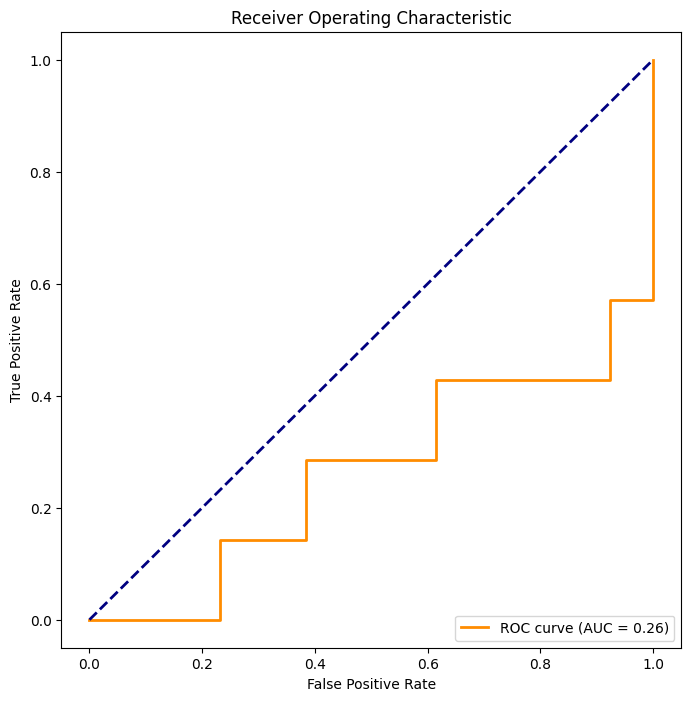

In [ ]:
# Calculate and display ROC curve for the best model
if best_model is not None:
    best_classifier = dict(classifiers)[best_model]
    probas_ = best_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

##Systematic Sampling

In [ ]:
systematic_sample_df = df[df.index % 10 == 0]  # Sample every 10th row

In [ ]:
systematic_sample_df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       1            0        342               2015                   7   
10      1            0         35               2015                   7   
20      1            0         72               2015                   7   
30      1            1         96               2015                   7   
40      1            0         16               2015                   7   

    arrival_date_week_number  arrival_date_day_of_month  meal  country  \
0                         27                          1     0      135   
10                        27                          1     2      135   
20                        27                          1     0      135   
30                        27                          1     0      135   
40                        27                          2     0       51   

    market_segment  ...  previous_bookings_not_canceled  deposit_type  \
0                3  ...                               0             0   
10               6  ...                               0             0   
20               3  ...                               0             0   
30               3  ...                               0             0   
40               3  ...                               0             0   

    days_in_waiting_list  customer_type     adr  total_guests  Corporate  \
0                      0              2    0.00           2.0        0.0   
10                     0              2  145.00           2.0        0.0   
20                     0              2   84.67           2.0        0.0   
30                     0              2  108.30           2.0        0.0   
40                     0              2  123.00           2.0        0.0   

    Direct  GDS  TA/TO  
0      1.0  0.0    0.0  
10     0.0  0.0    1.0  
20     1.0  0.0    0.0  
30     1.0  0.0    0.0  
40     1.0  0.0    0.0  

[5 rows x 21 columns]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Split features and target
X1 = systematic_sample_df.drop('is_canceled', axis=1)
y1 = systematic_sample_df['is_canceled']

# Reset index
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in RandomizedSearchCV
f1 = make_scorer(f1_score)

# Convert param_grid to param_dist for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the model, parameter distributions, and scoring metric
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring=f1,
    cv=3,
    verbose=2,
    n_jobs=-1,
    n_iter=10
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_res, y_res)

# Get the best parameters
best_params = random_search.best_params_

# Train a new Random Forest model on the resampled data using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_res, y_res)

# Make predictions on the test data
predictions = best_rf.predict(X_test)

# Evaluate the performance
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Cross-validation and confusion matrix for other classifiers
classifiers = [...]  # List of classifiers to compare
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []  # List to store AUC scores for each classifier

for clf_name, clf in classifiers:
    fold_accuracies = []

    for train_index, test_index in kf.split(X1, y1):
        X_train_fold, X_test_fold = X1.iloc[train_index], X1.iloc[test_index]
        y_train_fold, y_test_fold = y1.iloc[train_index], y1.iloc[test_index]

        # Fit the model on the training data
        clf.fit(X_train_fold, y_train_fold)

        # Make predictions on the test data
        predictions_fold = clf.predict(X_test_fold)

        # Evaluate the accuracy
        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        fold_accuracies.append(accuracy_fold)

    # Calculate and display the average accuracy
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f'{clf_name} Average Accuracy: {average_accuracy}')

    # Check if the current model is the best one
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_model = clf_name

    # Calculate ROC curve for each classifier
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append((clf_name, roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {clf_name}')
    plt.legend(loc='lower right')
    plt.show()

# Print AUC scores for each classifier
print("\nAUC Scores:")
for clf_name, roc_auc in roc_auc_scores:
    print(f'{clf_name}: {roc_auc:.2f}')


##Stratified Sampling

In [ ]:
stratified_sample_df = df.groupby('is_canceled', group_keys=False).apply(lambda x: x.sample(min(len(x), 50), random_state=42))

In [ ]:
stratified_sample_df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
71394      0            0         26               2016                  10   
15323      1            0         23               2015                  12   
16475      1            0         10               2016                   2   
1825       1            0         95               2015                   9   
15349      1            0        131               2015                  12   

       arrival_date_week_number  arrival_date_day_of_month  meal  country  \
71394                        44                         28     3      154   
15323                        51                         16     0       43   
16475                         7                          8     0      135   
1825                         39                         21     0       59   
15349                        52                         21     0       43   

       market_segment  ...  previous_bookings_not_canceled  deposit_type  \
71394               6  ...                               0             0   
15323               6  ...                               0             0   
16475               6  ...                               0             0   
1825                6  ...                               0             0   
15349               6  ...                               0             0   

       days_in_waiting_list  customer_type     adr  total_guests  Corporate  \
71394                     0              2  110.00           2.0        0.0   
15323                     0              2   53.90           2.0        0.0   
16475                     0              2   98.00           3.0        0.0   
1825                      0              2   73.98           2.0        0.0   
15349                     0              2   50.40           2.0        0.0   

       Direct  GDS  TA/TO  
71394     0.0  0.0    1.0  
15323     0.0  0.0    1.0  
16475     0.0  0.0    1.0  
1825      0.0  0.0    1.0  
15349     0.0  0.0    1.0  

[5 rows x 21 columns]

In [ ]:

# Split features and target
X1 = stratified_sample_df.drop('is_canceled', axis=1)
y1 = stratified_sample_df['is_canceled']

# Reset index
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in RandomizedSearchCV
f1 = make_scorer(f1_score)

# Convert param_grid to param_dist for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the model, parameter distributions, and scoring metric
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring=f1,
    cv=3,
    verbose=2,
    n_jobs=-1,
    n_iter=10
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_res, y_res)

# Get the best parameters
best_params = random_search.best_params_

# Train a new Random Forest model on the resampled data using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_res, y_res)

# Make predictions on the test data
predictions = best_rf.predict(X_test)

# Evaluate the performance
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Cross-validation and confusion matrix for other classifiers
classifiers = [...]  # List of classifiers to compare
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []  # List to store AUC scores for each classifier

for clf_name, clf in classifiers:
    fold_accuracies = []

    for train_index, test_index in kf.split(X1, y1):
        X_train_fold, X_test_fold = X1.iloc[train_index], X1.iloc[test_index]
        y_train_fold, y_test_fold = y1.iloc[train_index], y1.iloc[test_index]

        # Fit the model on the training data
        clf.fit(X_train_fold, y_train_fold)

        # Make predictions on the test data
        predictions_fold = clf.predict(X_test_fold)

        # Evaluate the accuracy
        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        fold_accuracies.append(accuracy_fold)

    # Calculate and display the average accuracy
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f'{clf_name} Average Accuracy: {average_accuracy}')

    # Check if the current model is the best one
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_model = clf_name

    # Calculate ROC curve for each classifier
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append((clf_name, roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {clf_name}')
    plt.legend(loc='lower right')
    plt.show()

# Print AUC scores for each classifier
print("\nAUC Scores:")
for clf_name, roc_auc in roc_auc_scores:
    print(f'{clf_name}: {roc_auc:.2f}')

##Progressive Sampling

In [ ]:
progressive_sample_df = df.sample(frac=0.1, replace=True, random_state=42)

In [ ]:
stratified_sample_df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
71394      0            0         26               2016                  10   
15323      1            0         23               2015                  12   
16475      1            0         10               2016                   2   
1825       1            0         95               2015                   9   
15349      1            0        131               2015                  12   

       arrival_date_week_number  arrival_date_day_of_month  meal  country  \
71394                        44                         28     3      154   
15323                        51                         16     0       43   
16475                         7                          8     0      135   
1825                         39                         21     0       59   
15349                        52                         21     0       43   

       market_segment  ...  previous_bookings_not_canceled  deposit_type  \
71394               6  ...                               0             0   
15323               6  ...                               0             0   
16475               6  ...                               0             0   
1825                6  ...                               0             0   
15349               6  ...                               0             0   

       days_in_waiting_list  customer_type     adr  total_guests  Corporate  \
71394                     0              2  110.00           2.0        0.0   
15323                     0              2   53.90           2.0        0.0   
16475                     0              2   98.00           3.0        0.0   
1825                      0              2   73.98           2.0        0.0   
15349                     0              2   50.40           2.0        0.0   

       Direct  GDS  TA/TO  
71394     0.0  0.0    1.0  
15323     0.0  0.0    1.0  
16475     0.0  0.0    1.0  
1825      0.0  0.0    1.0  
15349     0.0  0.0    1.0  

[5 rows x 21 columns]

In [ ]:

# Split features and target
X1 = progressive_sample_df.drop('is_canceled', axis=1)
y1 = progressive_sample_df['is_canceled']

# Reset index
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in RandomizedSearchCV
f1 = make_scorer(f1_score)

# Convert param_grid to param_dist for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the model, parameter distributions, and scoring metric
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring=f1,
    cv=3,
    verbose=2,
    n_jobs=-1,
    n_iter=10
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_res, y_res)

# Get the best parameters
best_params = random_search.best_params_

# Train a new Random Forest model on the resampled data using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_res, y_res)

# Make predictions on the test data
predictions = best_rf.predict(X_test)

# Evaluate the performance
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Cross-validation and confusion matrix for other classifiers
classifiers = [...]  # List of classifiers to compare
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []  # List to store AUC scores for each classifier

for clf_name, clf in classifiers:
    fold_accuracies = []

    for train_index, test_index in kf.split(X1, y1):
        X_train_fold, X_test_fold = X1.iloc[train_index], X1.iloc[test_index]
        y_train_fold, y_test_fold = y1.iloc[train_index], y1.iloc[test_index]

        # Fit the model on the training data
        clf.fit(X_train_fold, y_train_fold)

        # Make predictions on the test data
        predictions_fold = clf.predict(X_test_fold)

        # Evaluate the accuracy
        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        fold_accuracies.append(accuracy_fold)

    # Calculate and display the average accuracy
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f'{clf_name} Average Accuracy: {average_accuracy}')

    # Check if the current model is the best one
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_model = clf_name

    # Calculate ROC curve for each classifier
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append((clf_name, roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {clf_name}')
    plt.legend(loc='lower right')
    plt.show()

# Print AUC scores for each classifier
print("\nAUC Scores:")
for clf_name, roc_auc in roc_auc_scores:
    print(f'{clf_name}: {roc_auc:.2f}')

##Cluster Sampling

Since supervised learning is performed in this project, we limited the clusters and decided to perform clustring with Kmeans technique. Clustering is needed for cluster sampling the data and we know that it is an unsupervised learning method. But the rest of the project continues with supervised learning techniques.

In [ ]:
# Select three highly correlated features from the results of RFE
correlated_features = ['market_segment', 'previous_cancellations', 'deposit_type']

# Extract the subset of the DataFrame with the selected features
subset_df = df[correlated_features]

# Apply KMeans clustering
num_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(subset_df)

# Perform cluster sampling
selected_clusters = df['cluster'].sample(n=2, random_state=42).tolist()

# Select all observations within the selected clusters
cluster_sample = df[df['cluster'].isin(selected_clusters)]

# Display the resulting cluster sample
print(cluster_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



       hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
4          1            0         14               2015                   7   
7          1            1         85               2015                   7   
9          1            1         23               2015                   7   
10         1            0         35               2015                   7   
11         1            0         68               2015                   7   
...      ...          ...        ...                ...                 ...   
87214      0            0        135               2017                   8   
87218      0            0        102               2017                   8   
87219      0            0         34               2017                   8   
87220      0            0        109               2017                   8   
87221      0            0        205               2017                   8   

       arrival_date_week_number  arrival_date_day_o

In [ ]:

# Split features and target
X1 = cluster_sample.drop('is_canceled', axis=1)
y1 = cluster_sample['is_canceled']

# Reset index
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in RandomizedSearchCV
f1 = make_scorer(f1_score)

# Convert param_grid to param_dist for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the model, parameter distributions, and scoring metric
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring=f1,
    cv=3,
    verbose=2,
    n_jobs=-1,
    n_iter=10
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_res, y_res)

# Get the best parameters
best_params = random_search.best_params_

# Train a new Random Forest model on the resampled data using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_res, y_res)

# Make predictions on the test data
predictions = best_rf.predict(X_test)

# Evaluate the performance
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Cross-validation and confusion matrix for other classifiers
classifiers = [...]  # List of classifiers to compare
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []  # List to store AUC scores for each classifier

for clf_name, clf in classifiers:
    fold_accuracies = []

    for train_index, test_index in kf.split(X1, y1):
        X_train_fold, X_test_fold = X1.iloc[train_index], X1.iloc[test_index]
        y_train_fold, y_test_fold = y1.iloc[train_index], y1.iloc[test_index]

        # Fit the model on the training data
        clf.fit(X_train_fold, y_train_fold)

        # Make predictions on the test data
        predictions_fold = clf.predict(X_test_fold)

        # Evaluate the accuracy
        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        fold_accuracies.append(accuracy_fold)

    # Calculate and display the average accuracy
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f'{clf_name} Average Accuracy: {average_accuracy}')

    # Check if the current model is the best one
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_model = clf_name

    # Calculate ROC curve for each classifier
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append((clf_name, roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {clf_name}')
    plt.legend(loc='lower right')
    plt.show()

# Print AUC scores for each classifier
print("\nAUC Scores:")
for clf_name, roc_auc in roc_auc_scores:
    print(f'{clf_name}: {roc_auc:.2f}')

In [ ]:
clusters = df['cluster'].unique()
cluster_sample_df = pd.DataFrame()

for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    sample = cluster_data.sample(frac=0.2, random_state=42)
    cluster_sample_df = pd.concat([cluster_sample_df, sample])

In [ ]:
cluster_sample_df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
5720       1            1        240               2016                   8   
16538      1            0          0               2016                   2   
25057      1            0         20               2016                  11   
81596      0            0         22               2017                   5   
33252      1            0          0               2017                   8   

       arrival_date_week_number  arrival_date_day_of_month  meal  country  \
5720                         34                         15     0      135   
16538                         7                         12     0      135   
25057                        47                         13     0      135   
81596                        21                         26     0      135   
33252                        33                         14     0      135   

       market_segment  ...  deposit_type  days_in_waiting_list  customer_type  \
5720                3  ...             0                     0              2   
16538               3  ...             0                     0              3   
25057               3  ...             0                     0              2   
81596               3  ...             0                     0              2   
33252               3  ...             0                     0              2   

          adr  total_guests  Corporate  Direct  GDS  TA/TO  cluster  
5720   113.05           2.0        0.0     1.0  0.0    0.0        1  
16538   50.00           2.0        0.0     1.0  0.0    0.0        1  
25057   62.70           2.0        0.0     1.0  0.0    0.0        1  
81596    0.00           2.0        0.0     1.0  0.0    0.0        1  
33252  225.00           2.0        0.0     1.0  0.0    0.0        1  

[5 rows x 22 columns]

##Weighted Sampling

In [ ]:
weighted_sample_df = resample(df, replace=True, n_samples=100, random_state=42, stratify=df['is_canceled'], weights=df['weight_column'])

KeyError: ignored

In [ ]:

# Split features and target
X1 = weighted_sample_df.drop('is_canceled', axis=1)
y1 = weighted_sample_df['is_canceled']

# Reset index
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in RandomizedSearchCV
f1 = make_scorer(f1_score)

# Convert param_grid to param_dist for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the model, parameter distributions, and scoring metric
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring=f1,
    cv=3,
    verbose=2,
    n_jobs=-1,
    n_iter=10
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_res, y_res)

# Get the best parameters
best_params = random_search.best_params_

# Train a new Random Forest model on the resampled data using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_res, y_res)

# Make predictions on the test data
predictions = best_rf.predict(X_test)

# Evaluate the performance
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Cross-validation and confusion matrix for other classifiers
classifiers = [...]  # List of classifiers to compare
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []  # List to store AUC scores for each classifier

for clf_name, clf in classifiers:
    fold_accuracies = []

    for train_index, test_index in kf.split(X1, y1):
        X_train_fold, X_test_fold = X1.iloc[train_index], X1.iloc[test_index]
        y_train_fold, y_test_fold = y1.iloc[train_index], y1.iloc[test_index]

        # Fit the model on the training data
        clf.fit(X_train_fold, y_train_fold)

        # Make predictions on the test data
        predictions_fold = clf.predict(X_test_fold)

        # Evaluate the accuracy
        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        fold_accuracies.append(accuracy_fold)

    # Calculate and display the average accuracy
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f'{clf_name} Average Accuracy: {average_accuracy}')

    # Check if the current model is the best one
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_model = clf_name

    # Calculate ROC curve for each classifier
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append((clf_name, roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {clf_name}')
    plt.legend(loc='lower right')
    plt.show()

# Print AUC scores for each classifier
print("\nAUC Scores:")
for clf_name, roc_auc in roc_auc_scores:
    print(f'{clf_name}: {roc_auc:.2f}')

In [ ]:
print("Random Sample:")
print(random_sample_df.head())

print("\nSystematic Sample:")
print(systematic_sample_df.head())

print("\nStratified Sample:")
print(stratified_sample_df.head())

print("\nProgressive Sample:")
print(progressive_sample_df.head())

print("\nCluster Sample:")
print(cluster_sample_df.head())

print("\nWeighted Sample:")
print(weighted_sample_df.head())

Random Sample:

Systematic Sample:

Stratified Sample:
       hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
71394      0            0         26               2016                  10   
15323      1            0         23               2015                  12   
16475      1            0         10               2016                   2   
1825       1            0         95               2015                   9   
15349      1            0        131               2015                  12   

       arrival_date_week_number  arrival_date_day_of_month  meal  country  \
71394                        44                         28     3      154   
15323                        51                         16     0       43   
16475                         7                          8     0      135   
1825                         39                         21     0       59   
15349                        52                         21     0       43   

       

NameError: ignored

##Undersampling

In [ ]:
# Display class distribution before undersampling
class_distribution_before = df['is_canceled'].value_counts()
print("Class Distribution Before Undersampling:")
print(class_distribution_before)

Class Distribution Before Undersampling:
0    63213
1    24009
Name: is_canceled, dtype: int64


In [ ]:
# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df.drop('is_canceled', axis=1), df['is_canceled'])

# Combine the resampled data back into a DataFrame
undersampled_df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('is_canceled', axis=1).columns), pd.Series(y_resampled, name='is_canceled')], axis=1)

In [ ]:
# Display class distribution after undersampling
class_distribution_after = undersampled_df['is_canceled'].value_counts()
print("\nClass Distribution After Undersampling:")
print(class_distribution_after)


Class Distribution After Undersampling:
0    24009
1    24009
Name: is_canceled, dtype: int64


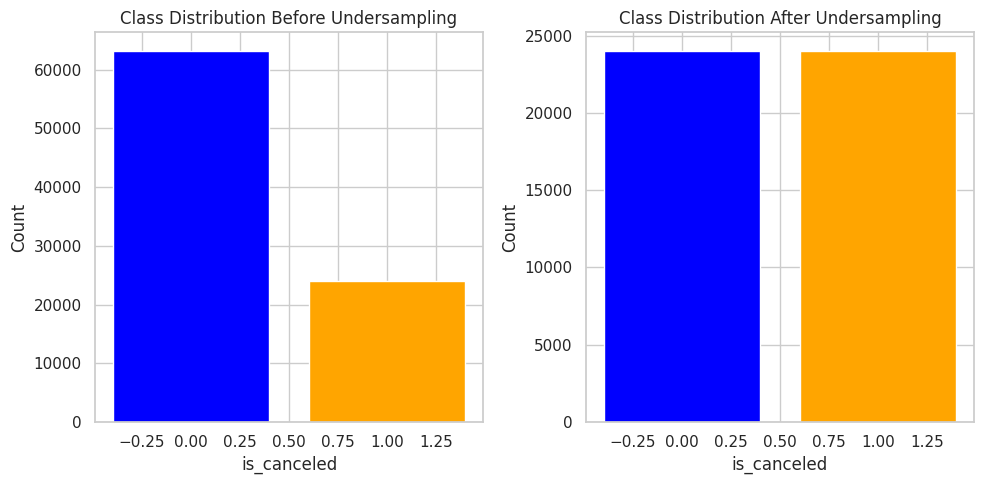

In [ ]:
# Plot class distribution before and after undersampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(class_distribution_before.index, class_distribution_before.values, color=['blue', 'orange'])
plt.title('Class Distribution Before Undersampling')
plt.xlabel('is_canceled')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(class_distribution_after.index, class_distribution_after.values, color=['blue', 'orange'])
plt.title('Class Distribution After Undersampling')
plt.xlabel('is_canceled')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:

# Split features and target
X1 = undersampled_df.drop('is_canceled', axis=1)
y1 = undersampled_df['is_canceled']

# Reset index
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in RandomizedSearchCV
f1 = make_scorer(f1_score)

# Convert param_grid to param_dist for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the model, parameter distributions, and scoring metric
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring=f1,
    cv=3,
    verbose=2,
    n_jobs=-1,
    n_iter=10
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_res, y_res)

# Get the best parameters
best_params = random_search.best_params_

# Train a new Random Forest model on the resampled data using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_res, y_res)

# Make predictions on the test data
predictions = best_rf.predict(X_test)

# Evaluate the performance
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Cross-validation and confusion matrix for other classifiers
classifiers = [...]  # List of classifiers to compare
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []  # List to store AUC scores for each classifier

for clf_name, clf in classifiers:
    fold_accuracies = []

    for train_index, test_index in kf.split(X1, y1):
        X_train_fold, X_test_fold = X1.iloc[train_index], X1.iloc[test_index]
        y_train_fold, y_test_fold = y1.iloc[train_index], y1.iloc[test_index]

        # Fit the model on the training data
        clf.fit(X_train_fold, y_train_fold)

        # Make predictions on the test data
        predictions_fold = clf.predict(X_test_fold)

        # Evaluate the accuracy
        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        fold_accuracies.append(accuracy_fold)

    # Calculate and display the average accuracy
    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f'{clf_name} Average Accuracy: {average_accuracy}')

    # Check if the current model is the best one
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_model = clf_name

    # Calculate ROC curve for each classifier
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append((clf_name, roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {clf_name}')
    plt.legend(loc='lower right')
    plt.show()

# Print AUC scores for each classifier
print("\nAUC Scores:")
for clf_name, roc_auc in roc_auc_scores:
    print(f'{clf_name}: {roc_auc:.2f}')

#Imbalanced Data

##Downsampling Majority Class (Random Under Sampling)

In [ ]:
# Display class distribution before downsampling
class_distribution_before = df['is_canceled'].value_counts()
print("Class Distribution Before Downsampling:")
print(class_distribution_before)

Class Distribution Before Downsampling:
0    47253
1    19494
Name: is_canceled, dtype: int64


In [ ]:
# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df.drop('is_canceled', axis=1), df['is_canceled'])

# Combine the resampled data back into a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('is_canceled', axis=1).columns), pd.Series(y_resampled, name='is_canceled')], axis=1)

In [ ]:
# Display class distribution after downsampling
class_distribution_after = downsampled_df['is_canceled'].value_counts()
print("\nClass Distribution After Downsampling:")
print(class_distribution_after)


Class Distribution After Downsampling:
0    19494
1    19494
Name: is_canceled, dtype: int64


##Upsampling Minority Class

In [ ]:
# Display class distribution before upsampling
class_distribution_before = df['is_canceled'].value_counts()
print("Class Distribution Before Upsampling:")
print(class_distribution_before)

Class Distribution Before Upsampling:
0    47253
1    19494
Name: is_canceled, dtype: int64


In [ ]:
# Apply Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop('is_canceled', axis=1), df['is_canceled'])

# Combine the resampled data back into a DataFrame
upsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('is_canceled', axis=1).columns), pd.Series(y_resampled, name='is_canceled')], axis=1)

In [ ]:
# Display class distribution after upsampling
class_distribution_after = upsampled_df['is_canceled'].value_counts()
print("\nClass Distribution After Upsampling:")
print(class_distribution_after)


Class Distribution After Upsampling:
0    47253
1    47253
Name: is_canceled, dtype: int64


#Ensembling Different Resampled Datasets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_canceled', axis=1), df['is_canceled'], test_size=0.2, random_state=42)

# Train models on different resampled datasets
model1 = RandomForestClassifier(random_state=42)
model1.fit(downsampled_df.drop('is_canceled', axis=1), downsampled_df['is_canceled'])

model2 = RandomForestClassifier(random_state=42)
model2.fit(upsampled_df.drop('is_canceled', axis=1), upsampled_df['is_canceled'])

# Ensemble the models
ensemble_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2)], voting='hard')
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")

ValueError: ignored

##Balanced Class Weight

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                               object
country                            object
market_segment                     object
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
reservation_status                 object
arrival_date                       object
total_guests                      float64
Corporate                         float64
Direct                            float64
GDS                               float64
TA/TO                             float64
Undefined                         

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_canceled', axis=1), df['is_canceled'], test_size=0.2, random_state=42)

# Train a Random Forest classifier with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Balanced Class Weight: {accuracy}")

ValueError: ignored

##Generate Synthetic Data

In [ ]:
# Display class distribution before SMOTE
class_distribution_before = df['is_canceled'].value_counts()
print("Class Distribution Before SMOTE:")
print(class_distribution_before)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Class Distribution Before SMOTE:
0    63213
1    24009
Name: is_canceled, dtype: int64


SMOTE FOR ANOTHER DOMESINONASKDJNASIOJHDIUASGD

In [ ]:
from imblearn.over_sampling import SMOTENC
import pandas as pd

# Display class distribution before SMOTE-NC
class_distribution_before = df['is_canceled'].value_counts()
print("Class Distribution Before SMOTE-NC:")
print(class_distribution_before)

Class Distribution Before SMOTE-NC:
0    63213
1    24009
Name: is_canceled, dtype: int64


In [ ]:
# Specify which features are categorical
categorical_features = [2, 4, 6]  # Adjust these indices based on your DataFrame

# Apply SMOTE-NC
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(df.drop('is_canceled', axis=1), df['is_canceled'])

# Combine the resampled data back into a DataFrame
smotenc_df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('is_canceled', axis=1).columns), pd.Series(y_resampled, name='is_canceled')], axis=1)

In [ ]:
# Display class distribution after SMOTE-NC
class_distribution_after = smotenc_df['is_canceled'].value_counts()
print("\nClass Distribution After SMOTE-NC:")
print(class_distribution_after)


Class Distribution After SMOTE-NC:
0    63213
1    63213
Name: is_canceled, dtype: int64


## K-fold Cross Validation

In [ ]:
# Set up K-fold cross-validation
num_folds = 5  # Choose the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a model (Random Forest classifier in this example)
model = RandomForestClassifier(random_state=42)

# Perform K-fold cross-validation
fold_accuracies = []

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    fold_accuracies.append(accuracy)

In [ ]:
# Display the accuracies for each fold
for i, accuracy in enumerate(fold_accuracies, 1):
    print(f'Fold {i} Accuracy: {accuracy}')

Fold 1 Accuracy: 0.7918028088277443
Fold 2 Accuracy: 0.791286901691029
Fold 3 Accuracy: 0.7939119468011924
Fold 4 Accuracy: 0.7925934418711305
Fold 5 Accuracy: 0.7959183673469388


In [ ]:
# Calculate and display the average accuracy
average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f'Average Accuracy: {average_accuracy}')

Average Accuracy: 0.7931026933076069
